In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files

In [ ]:
!cp /content/drive/MyDrive/thesis.py /content

In [ ]:
import thesis
#def IMPORT():
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/CAD_USD_15min.csv')
df.dropna(inplace=True)
df['timestamp'] = pd.to_datetime(df['timestamp'], infer_datetime_format=True)

df.set_index('timestamp', inplace=True)
print(df.shape)
df.head()

(74263, 4)


,open,close,low,high
timestamp,,,,
2020-01-01 17:00:00,1.29842,1.29803,1.29777,1.29863
2020-01-01 17:15:00,1.29845,1.29816,1.29796,1.29845
2020-01-01 17:30:00,1.29817,1.29803,1.29803,1.29824
2020-01-01 17:45:00,1.29804,1.29847,1.29804,1.29852
2020-01-01 18:00:00,1.29853,1.29765,1.29753,1.29853


In [ ]:
df=thesis.AddingColumn(df)
print(df.shape)
df.head()

(74262, 12)


/content/thesis.py:42: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week'] = df.index.week


,open,close,low,high,previous_close,hour,day,week,momentum,avg_price,range,ohlc_price
timestamp,,,,,,,,,,,,
2020-01-01 17:00:00,1.29842,1.29803,1.29777,1.29863,1.29816,17,2,1,0.00039,1.298200,0.00086,1.298212
2020-01-01 17:15:00,1.29845,1.29816,1.29796,1.29845,1.29803,17,2,1,0.00029,1.298205,0.00049,1.298255
2020-01-01 17:30:00,1.29817,1.29803,1.29803,1.29824,1.29847,17,2,1,0.00014,1.298135,0.00021,1.298118
2020-01-01 17:45:00,1.29804,1.29847,1.29804,1.29852,1.29765,17,2,1,-0.00043,1.298280,0.00048,1.298268
2020-01-01 18:00:00,1.29853,1.29765,1.29753,1.29853,1.29761,18,2,1,0.00088,1.298030,0.00100,1.298060


In [ ]:
df=thesis.ApplyPCA(df)
df.head()

,open,close,low,high,previous_close,hour,day,week,momentum,avg_price,range,ohlc_price,pca
timestamp,,,,,,,,,,,,,
2020-01-01 17:00:00,1.29842,1.29803,1.29777,1.29863,1.29816,17,2,1,0.00039,1.298200,0.00086,1.298212,-25.516731
2020-01-01 17:15:00,1.29845,1.29816,1.29796,1.29845,1.29803,17,2,1,0.00029,1.298205,0.00049,1.298255,-25.516840
2020-01-01 17:30:00,1.29817,1.29803,1.29803,1.29824,1.29847,17,2,1,0.00014,1.298135,0.00021,1.298118,-25.516840
2020-01-01 17:45:00,1.29804,1.29847,1.29804,1.29852,1.29765,17,2,1,-0.00043,1.298280,0.00048,1.298268,-25.516838
2020-01-01 18:00:00,1.29853,1.29765,1.29753,1.29853,1.29761,18,2,1,0.00088,1.298030,0.00100,1.298060,-25.517241


In [ ]:
X = df.drop('close', axis=1)
print(X.head())
y=pd.DataFrame(df['close'])
print(y.head())

                        open      low     high  previous_close  hour  day  \
timestamp                                                                   
2020-01-01 17:00:00  1.29842  1.29777  1.29863         1.29816    17    2   
2020-01-01 17:15:00  1.29845  1.29796  1.29845         1.29803    17    2   
2020-01-01 17:30:00  1.29817  1.29803  1.29824         1.29847    17    2   
2020-01-01 17:45:00  1.29804  1.29804  1.29852         1.29765    17    2   
2020-01-01 18:00:00  1.29853  1.29753  1.29853         1.29761    18    2   

                     week  momentum  avg_price    range  ohlc_price        pca  
timestamp                                                                       
2020-01-01 17:00:00     1   0.00039   1.298200  0.00086    1.298212 -25.516731  
2020-01-01 17:15:00     1   0.00029   1.298205  0.00049    1.298255 -25.516840  
2020-01-01 17:30:00     1   0.00014   1.298135  0.00021    1.298118 -25.516840  
2020-01-01 17:45:00     1  -0.00043   1.298280  0.00048

In [ ]:
x_train, y_train, x_val, y_val, x_test, y_test = thesis.Train_Val_Test_split_15Min(X,y)

59409
59409
7500
7500
7353
7353


In [ ]:
x_train = x_train.values.astype('float32')
x_train=thesis.NormalizeDataset(x_train)

y_train = y_train.values.astype('float32')
y_train = np.reshape(y_train, (-1, 1))
y_train=thesis.NormalizeDataset(y_train)

x_train.shape



(59409, 12)

In [ ]:
x_val = x_val.values.astype('float32')
x_val=thesis.NormalizeDataset(x_val)

y_val = y_val.values.astype('float32')
y_val = np.reshape(y_val, (-1, 1))
y_val=thesis.NormalizeDataset(y_val)


In [ ]:
x_test = x_test.values.astype('float32')
x_test=thesis.NormalizeDataset(x_test)

y_test = y_test.values.astype('float32')
y_test = np.reshape(y_test, (-1, 1))
y_test=thesis.NormalizeDataset(y_test)

In [ ]:
window=24
x_train, x_val, x_test = thesis.df_to_numpy_array_features(x_train, x_val, x_test, window)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(59384, 24, 12)
(7475, 24, 12)
(7328, 24, 12)


In [ ]:
y_train, y_val, y_test= thesis.df_to_numpy_array_target(y_train, y_val, y_test, window)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)
y_train

(59384, 1)
(7475, 1)
(7328, 1)


array([[0.36816883],
       [0.36865902],
       [0.36877203],
       ...,
       [0.29607248],
       [0.29486656],
       [0.2973919 ]], dtype=float32)

In [ ]:
y_train=y_train[:,-1]
y_val=y_val[:,-1]
y_test=y_test[:,-1]
y_train

array([0.36816883, 0.36865902, 0.36877203, ..., 0.29607248, 0.29486656,
       0.2973919 ], dtype=float32)

In [ ]:
model= thesis.GRU_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 24, 256)           207360    
                                                                 
 gru_1 (GRU)                 (None, 24, 64)            61824     
                                                                 
 dropout (Dropout)           (None, 24, 64)            0         
                                                                 
 gru_2 (GRU)                 (None, 16)                3936      
                                                                 
 dense (Dense)               (None, 32)                544       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 1

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/CAD15minGRU.hdf5", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
464/464 [==============================] - ETA: 0s - loss: 582.7573 - mae: 7.3409 - mse: 582.7573 - root_mean_squared_error: 24.1404 - mape: 41412.7422
Epoch 1: val_mse improved from inf to 0.17596, saving model to /content/drive/MyDrive/modelweights/CAD15minGRU.hdf5
464/464 [==============================] - 115s 235ms/step - loss: 582.7573 - mae: 7.3409 - mse: 582.7573 - root_mean_squared_error: 24.1404 - mape: 41412.7422 - val_loss: 0.1760 - val_mae: 0.3676 - val_mse: 0.1760 - val_root_mean_squared_error: 0.4195 - val_mape: 120102.6562
Epoch 2/75
464/464 [==============================] - ETA: 0s - loss: 0.1705 - mae: 0.3673 - mse: 0.1705 - root_mean_squared_error: 0.4129 - mape: 13350.8027
Epoch 2: val_mse improved from 0.17596 to 0.04202, saving model to /content/drive/MyDrive/modelweights/CAD15minGRU.hdf5
464/464 [==============================] - 98s 211ms/step - loss: 0.1705 - mae: 0.3673 - mse: 0.1705 - root_mean_squared_error: 0.4129 - mape: 13350.8027 - val_loss: 

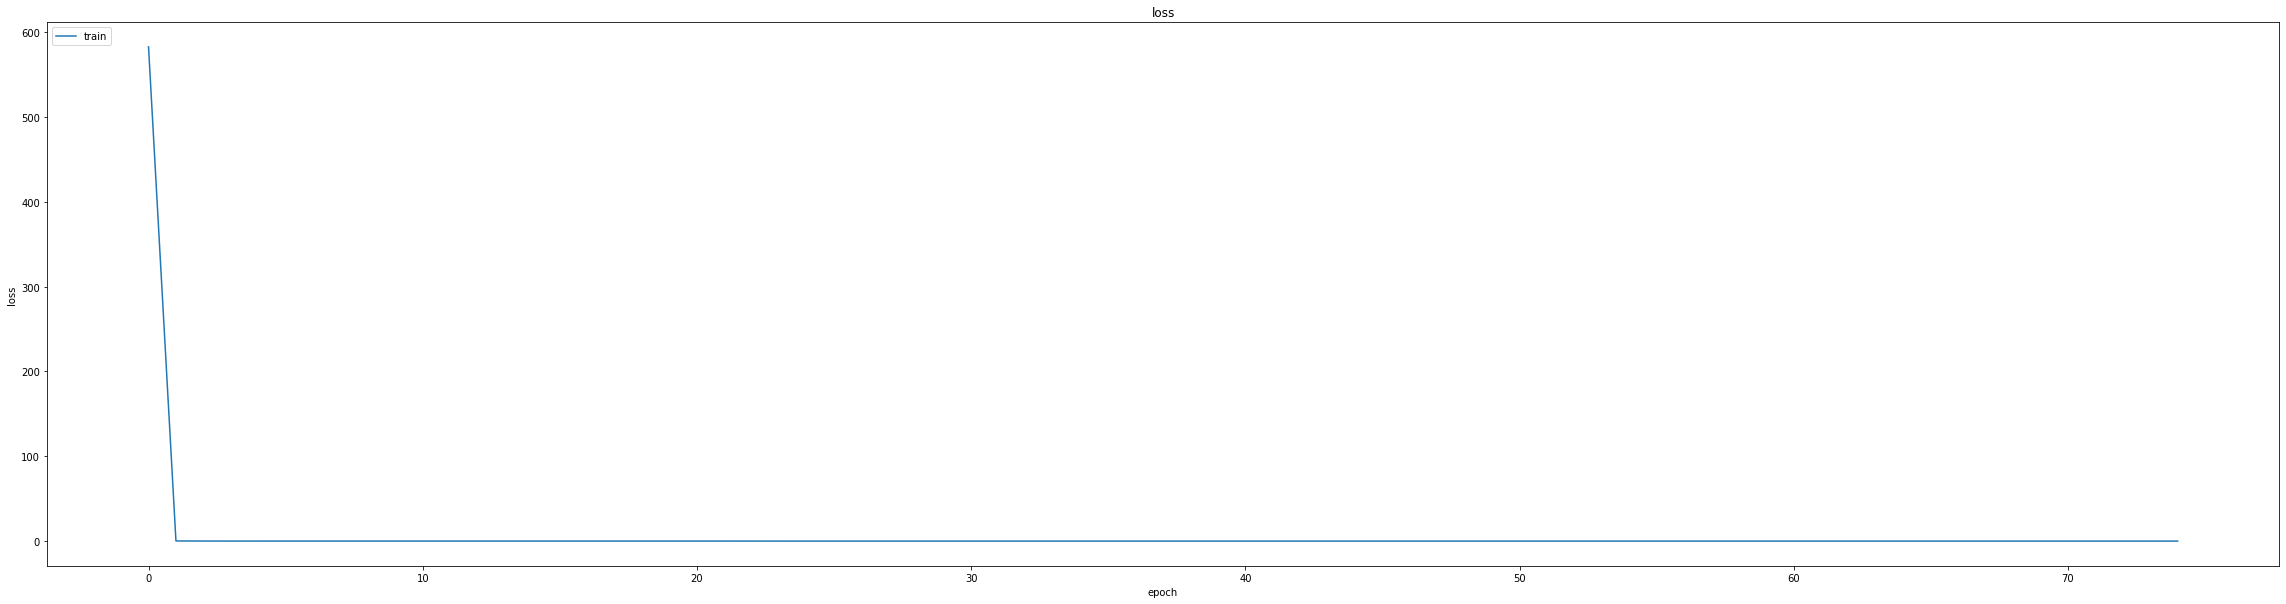

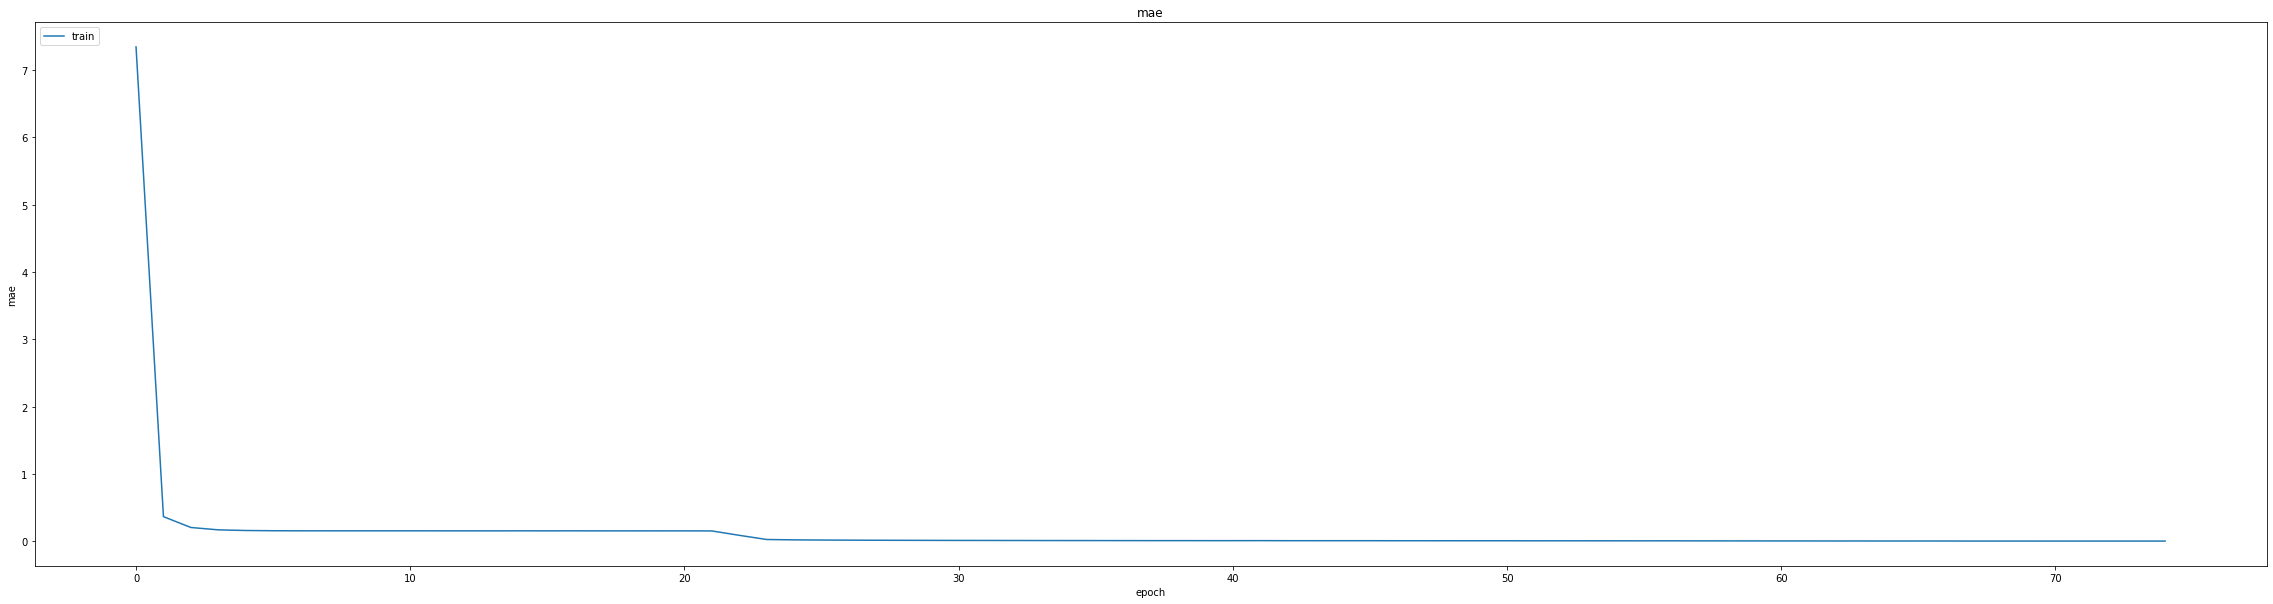

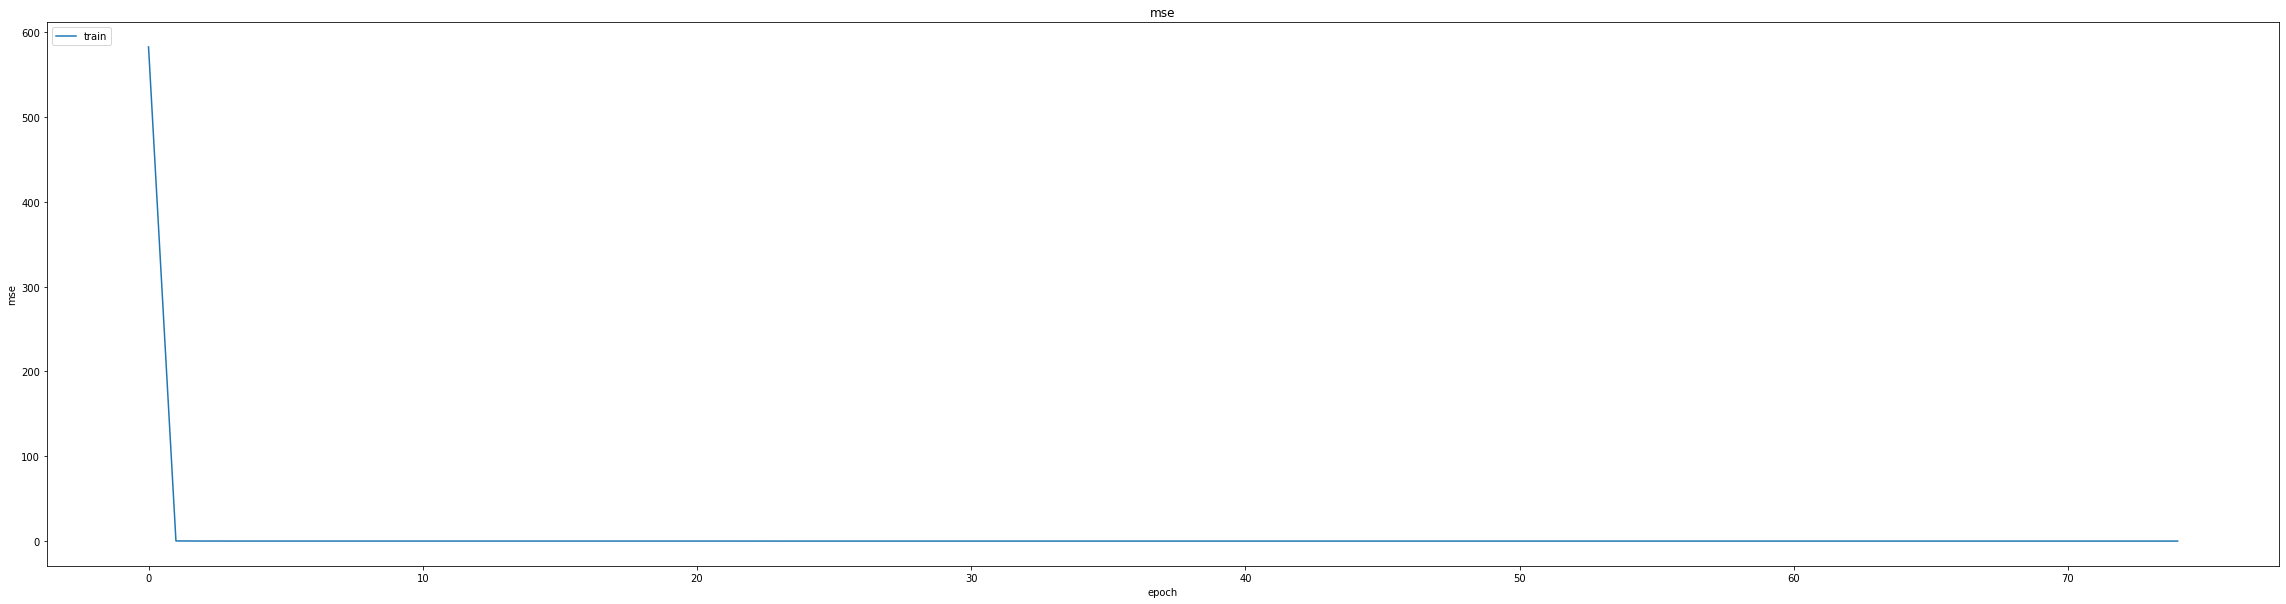

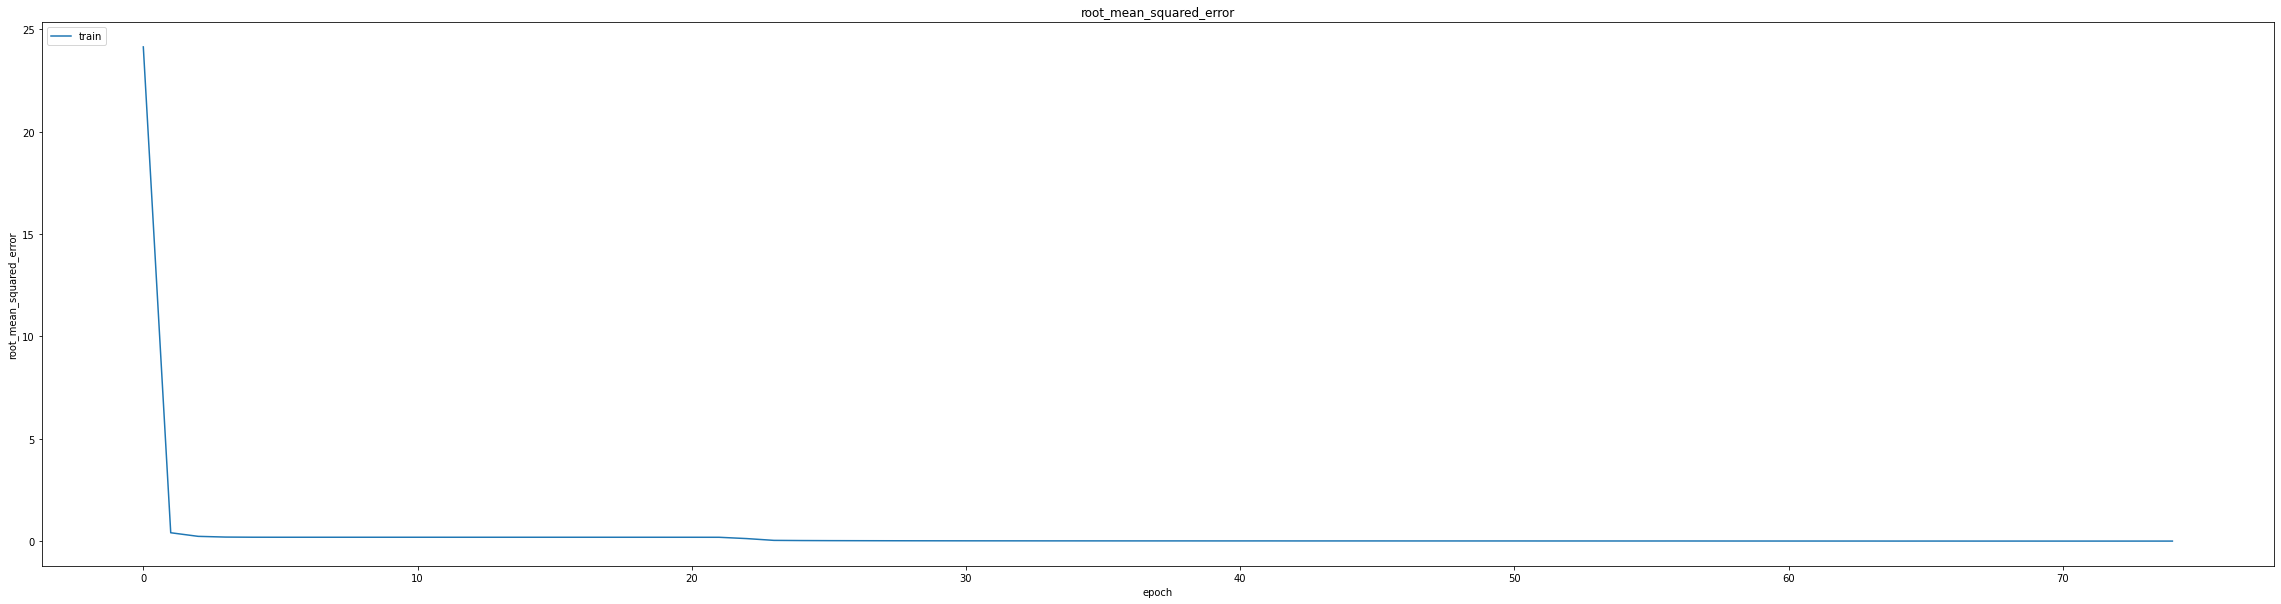

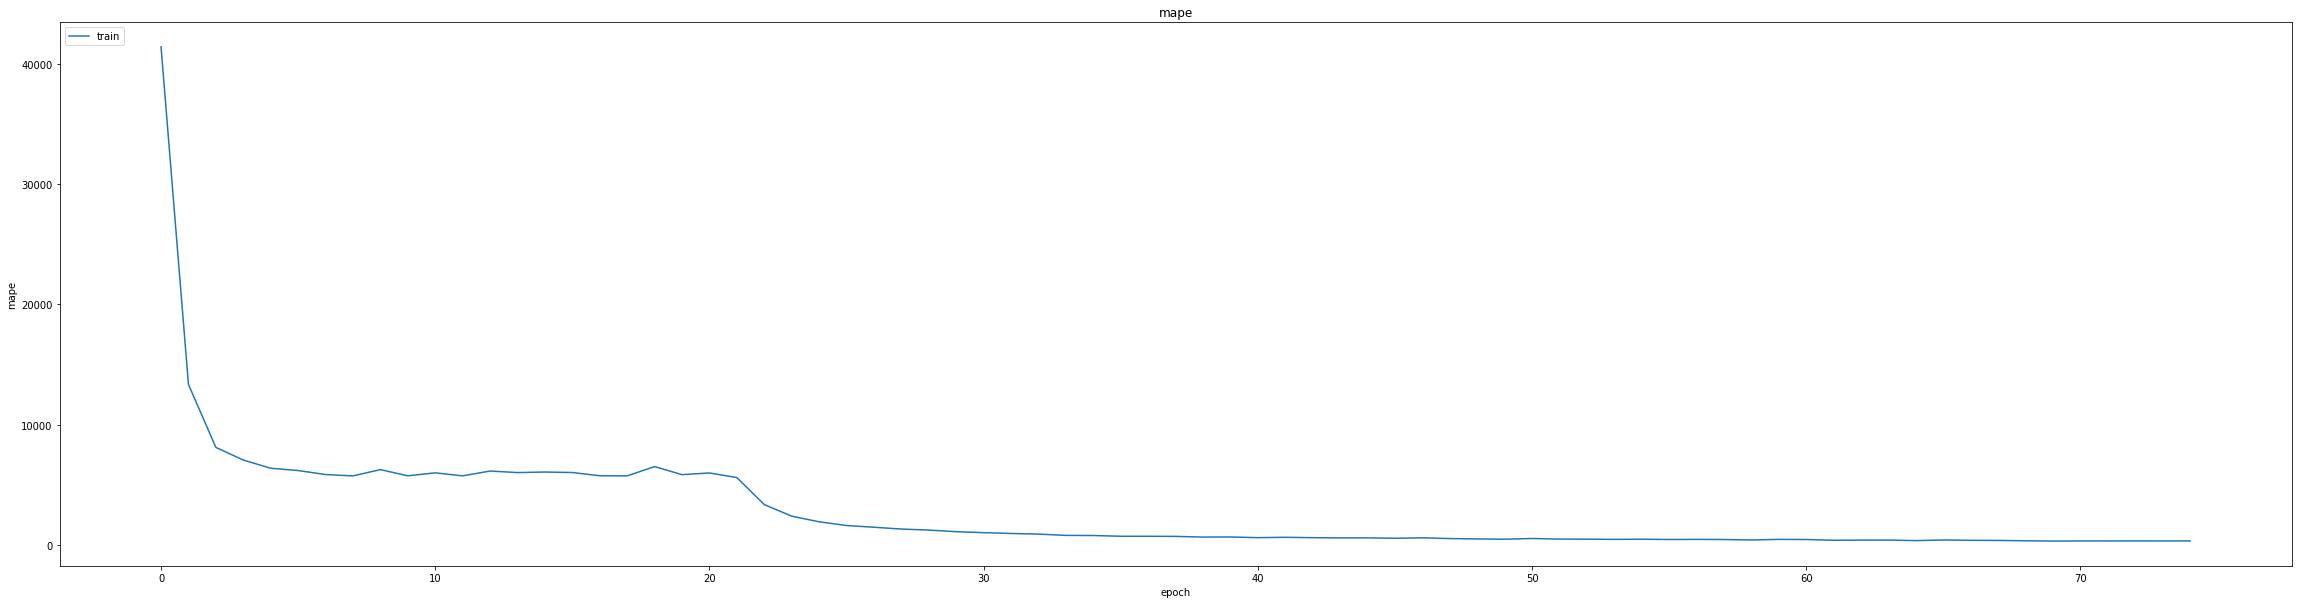

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.018848951905965805
0.024784205481410027
234/234 [==============================] - 7s 26ms/step
0.9838274902716542


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CAD15minGRU.hdf5")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
464/464 [==============================] - ETA: 0s - loss: 1.1986e-04 - mae: 0.0060 - mse: 1.1986e-04 - root_mean_squared_error: 0.0109 - mape: 356.8338
Epoch 1: val_mse did not improve from 0.00061
464/464 [==============================] - 96s 196ms/step - loss: 1.1986e-04 - mae: 0.0060 - mse: 1.1986e-04 - root_mean_squared_error: 0.0109 - mape: 356.8338 - val_loss: 7.8896e-04 - val_mae: 0.0226 - val_mse: 7.8896e-04 - val_root_mean_squared_error: 0.0281 - val_mape: 2836.1611 - lr: 0.0010
Epoch 2/25
464/464 [==============================] - ETA: 0s - loss: 3.4252e-05 - mae: 0.0044 - mse: 3.4252e-05 - root_mean_squared_error: 0.0059 - mape: 360.3901
Epoch 2: val_mse improved from 0.00061 to 0.00052, saving model to /content/drive/MyDrive/modelweights/CAD15minGRU.hdf5
464/464 [==============================] - 94s 204ms/step - loss: 3.4252e-05 - mae: 0.0044 - mse: 3.4252e-05 - root_mean_squared_error: 0.0059 - mape: 360.3901 - val_loss: 5.2366e-04 - val_mae: 0.0176 - val_mse

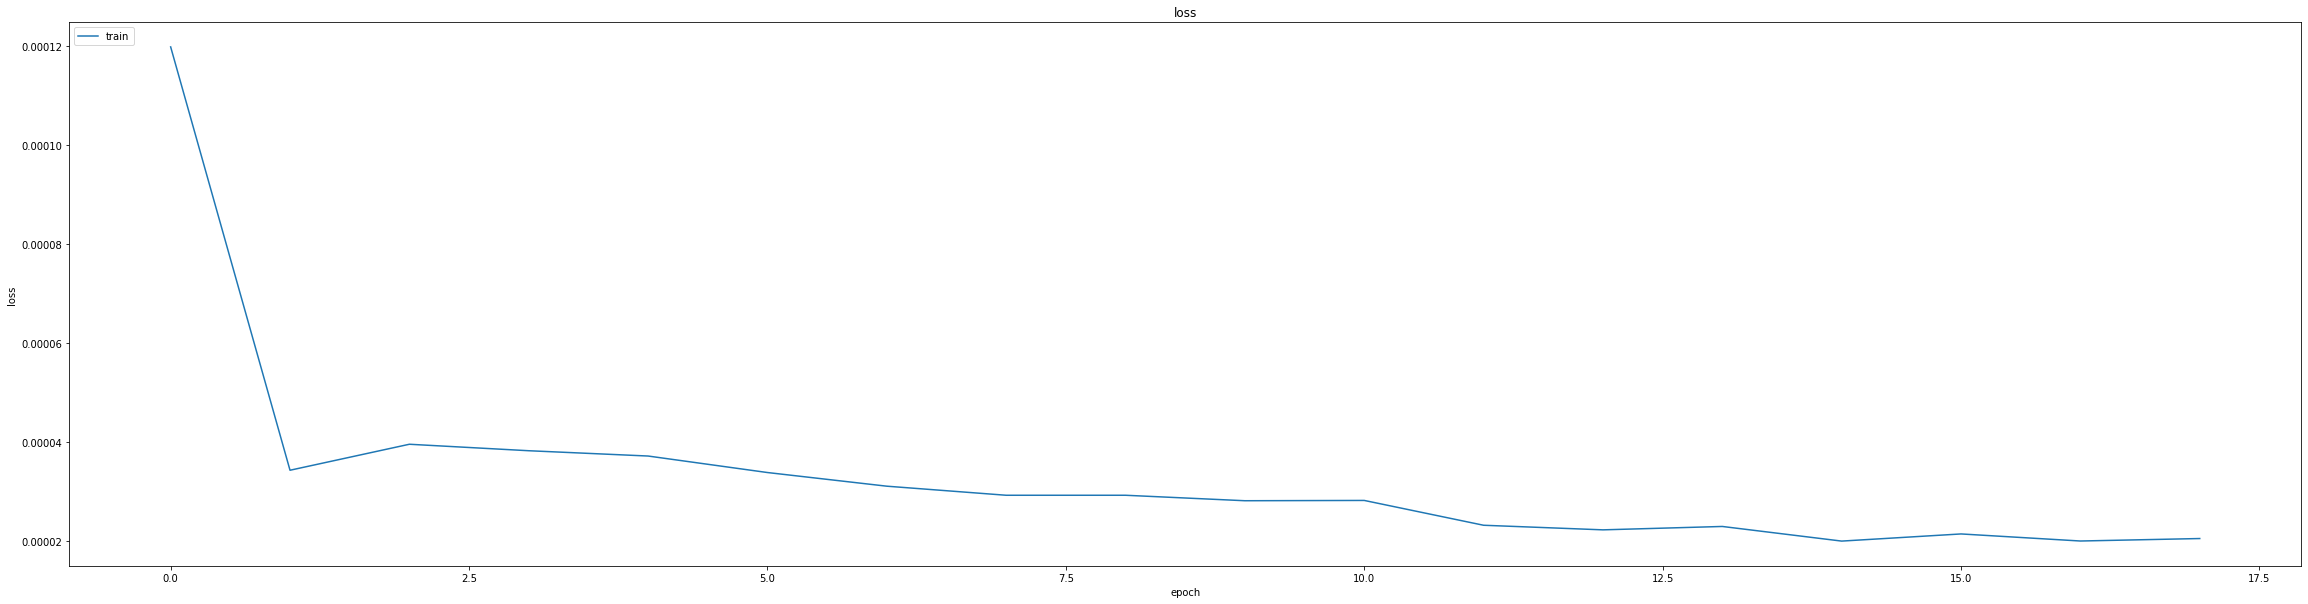

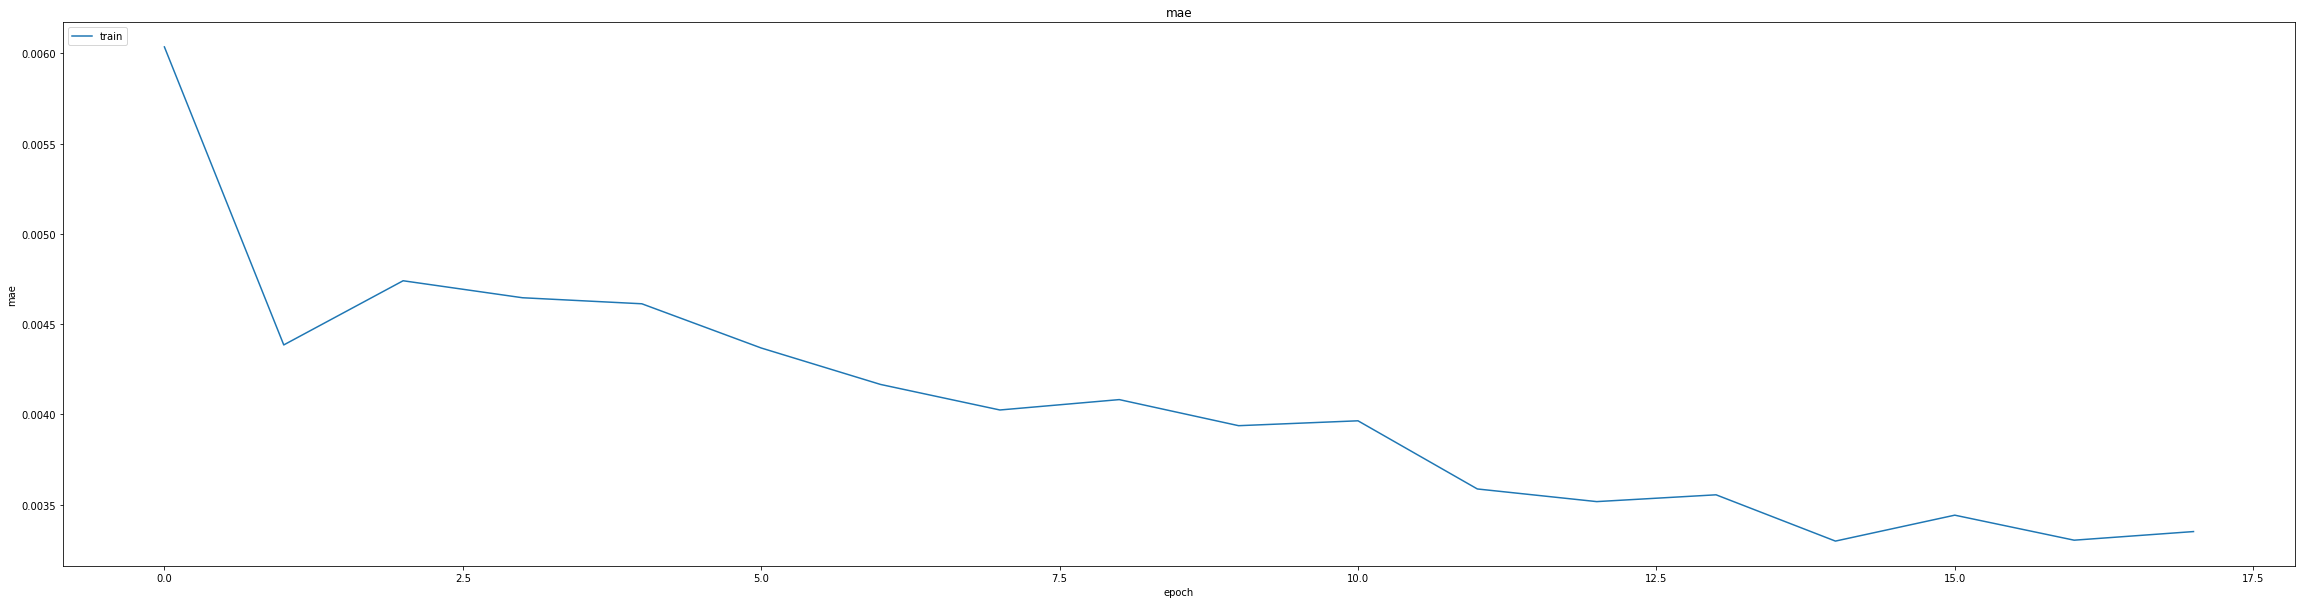

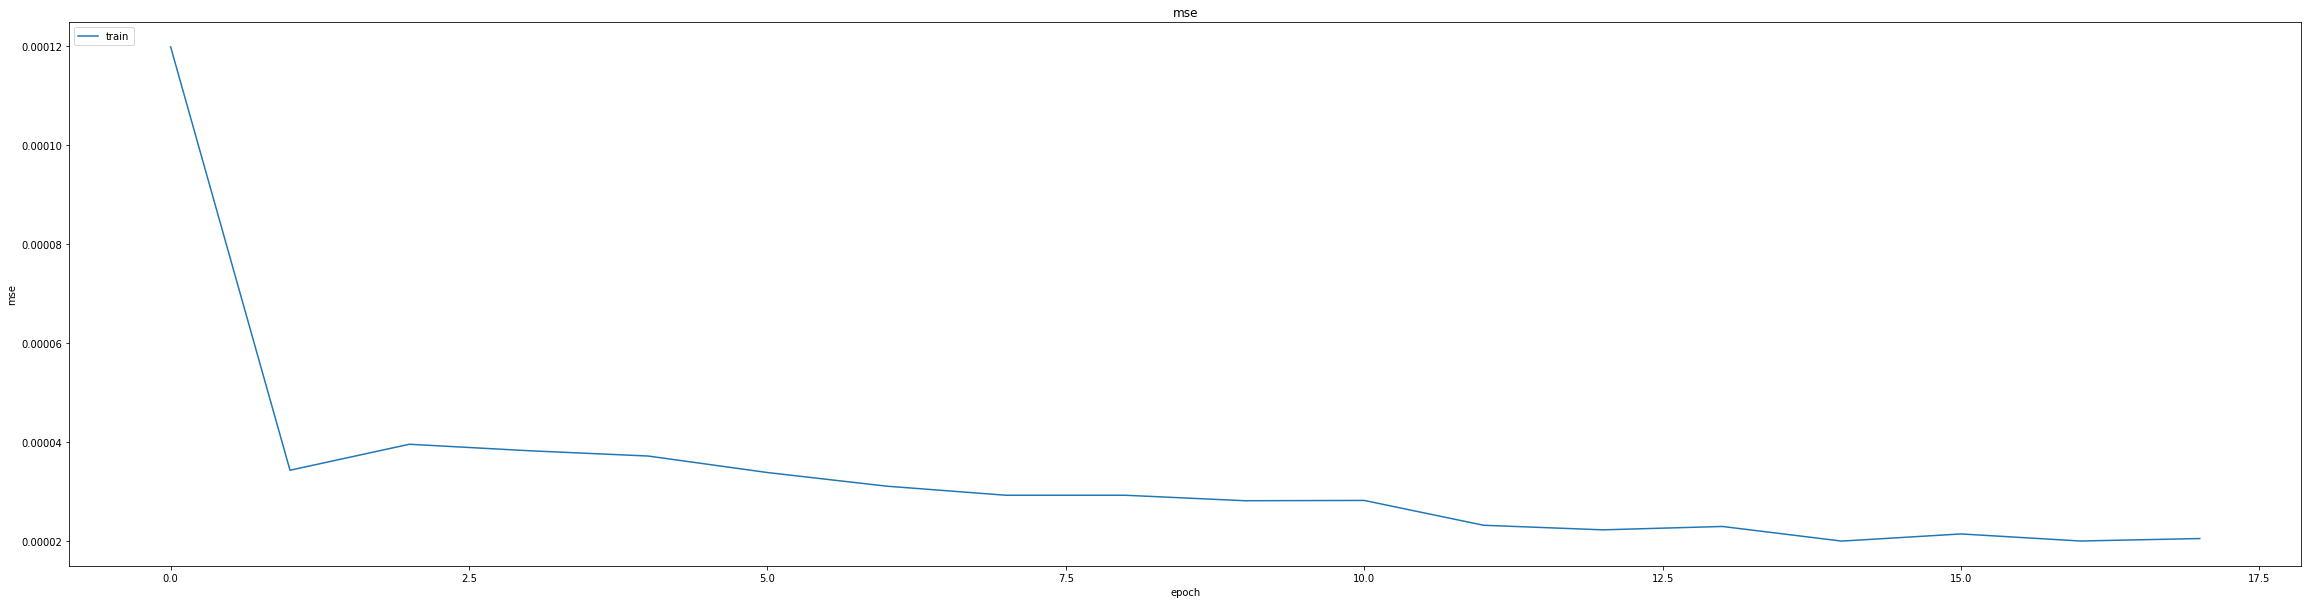

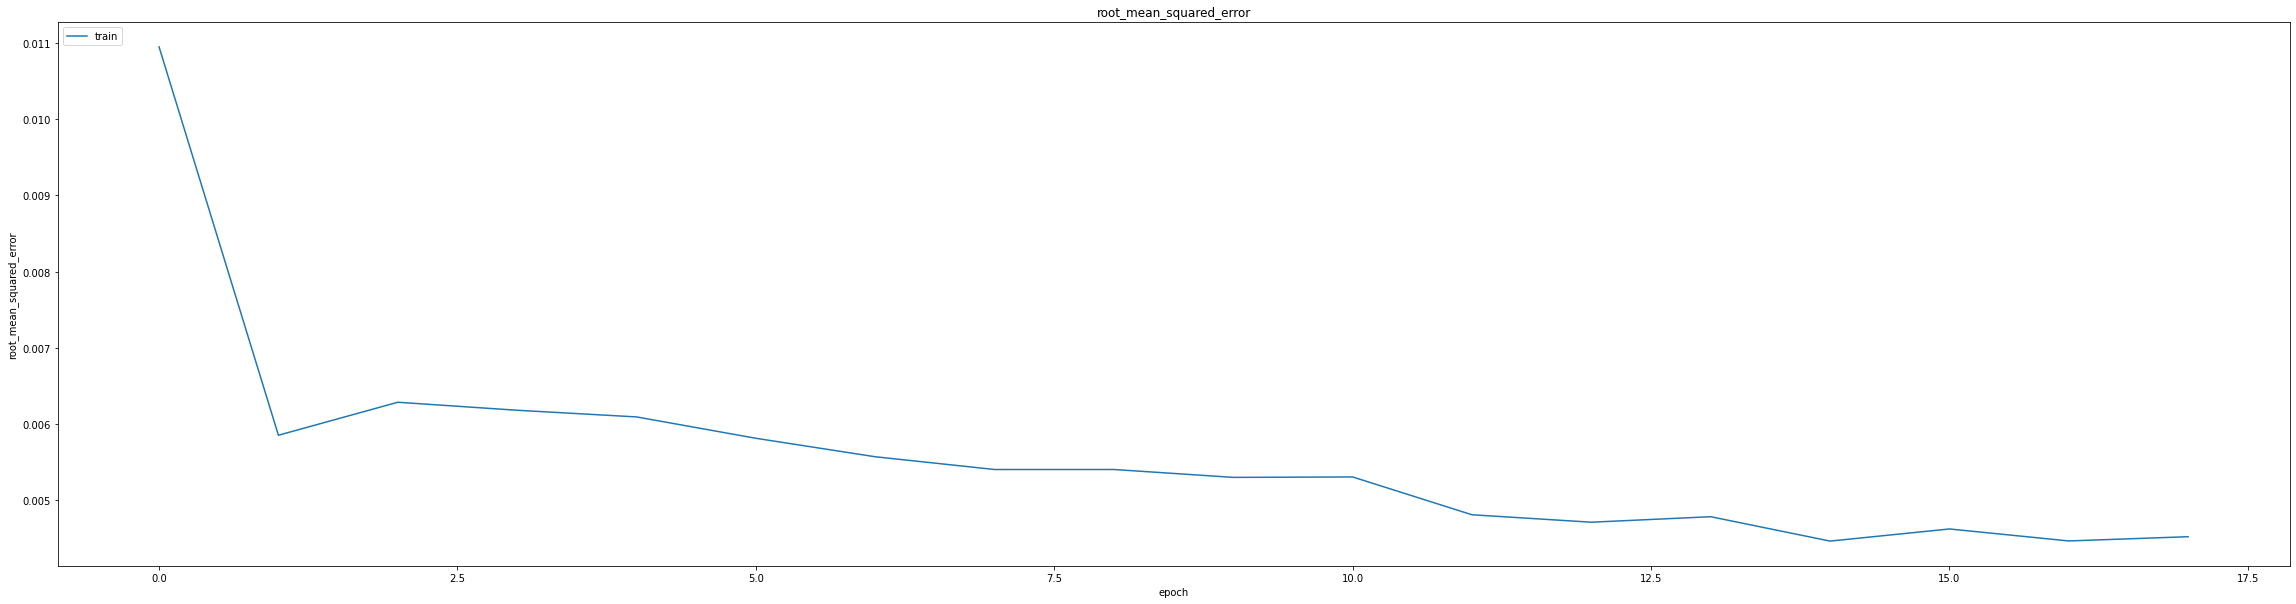

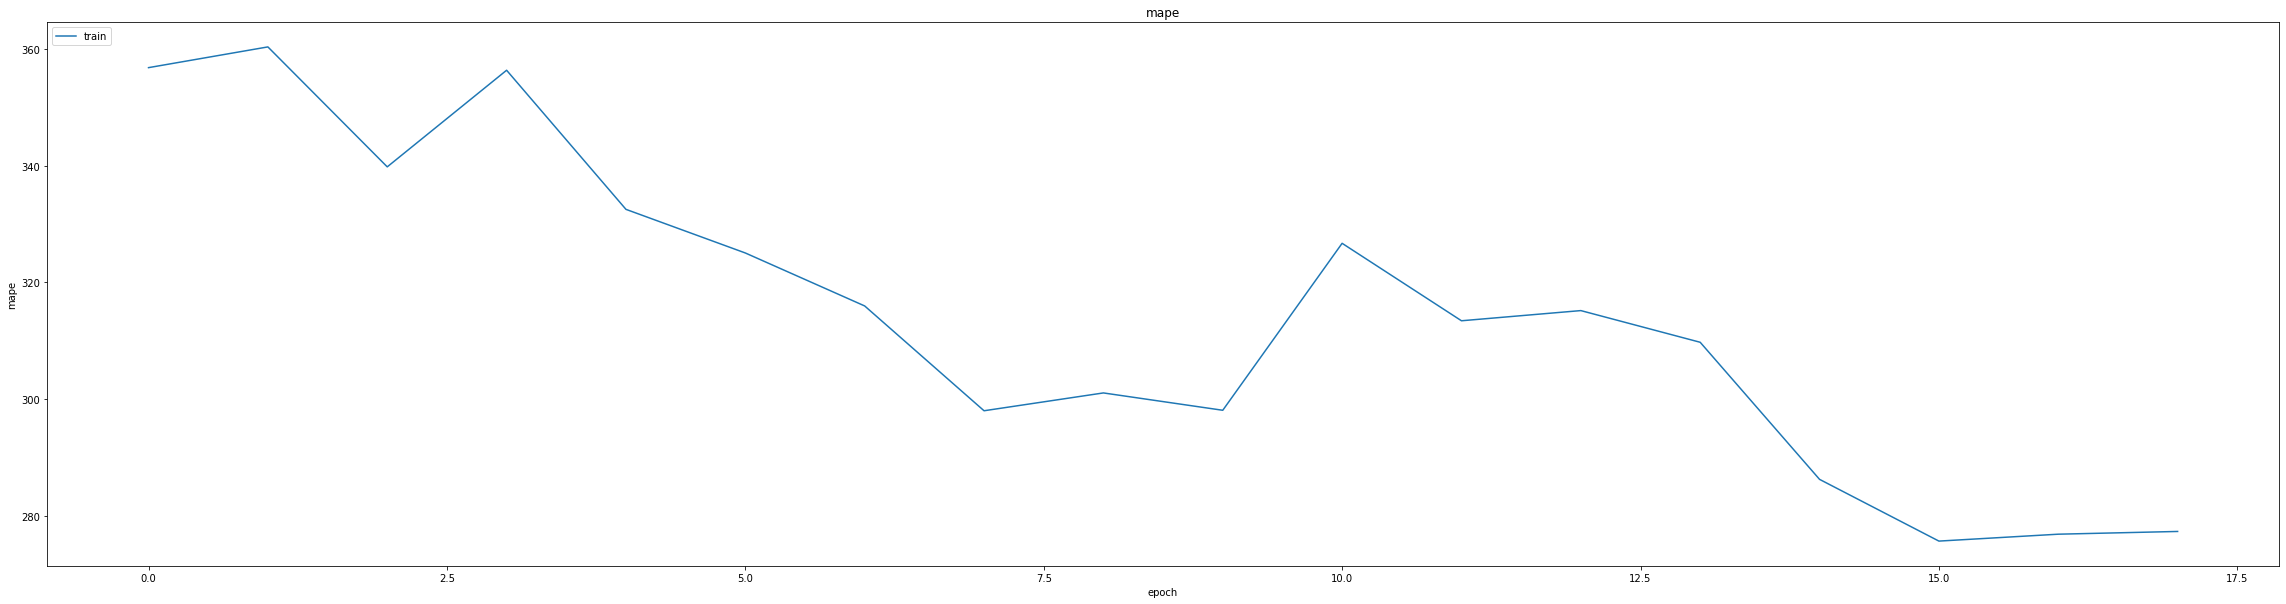

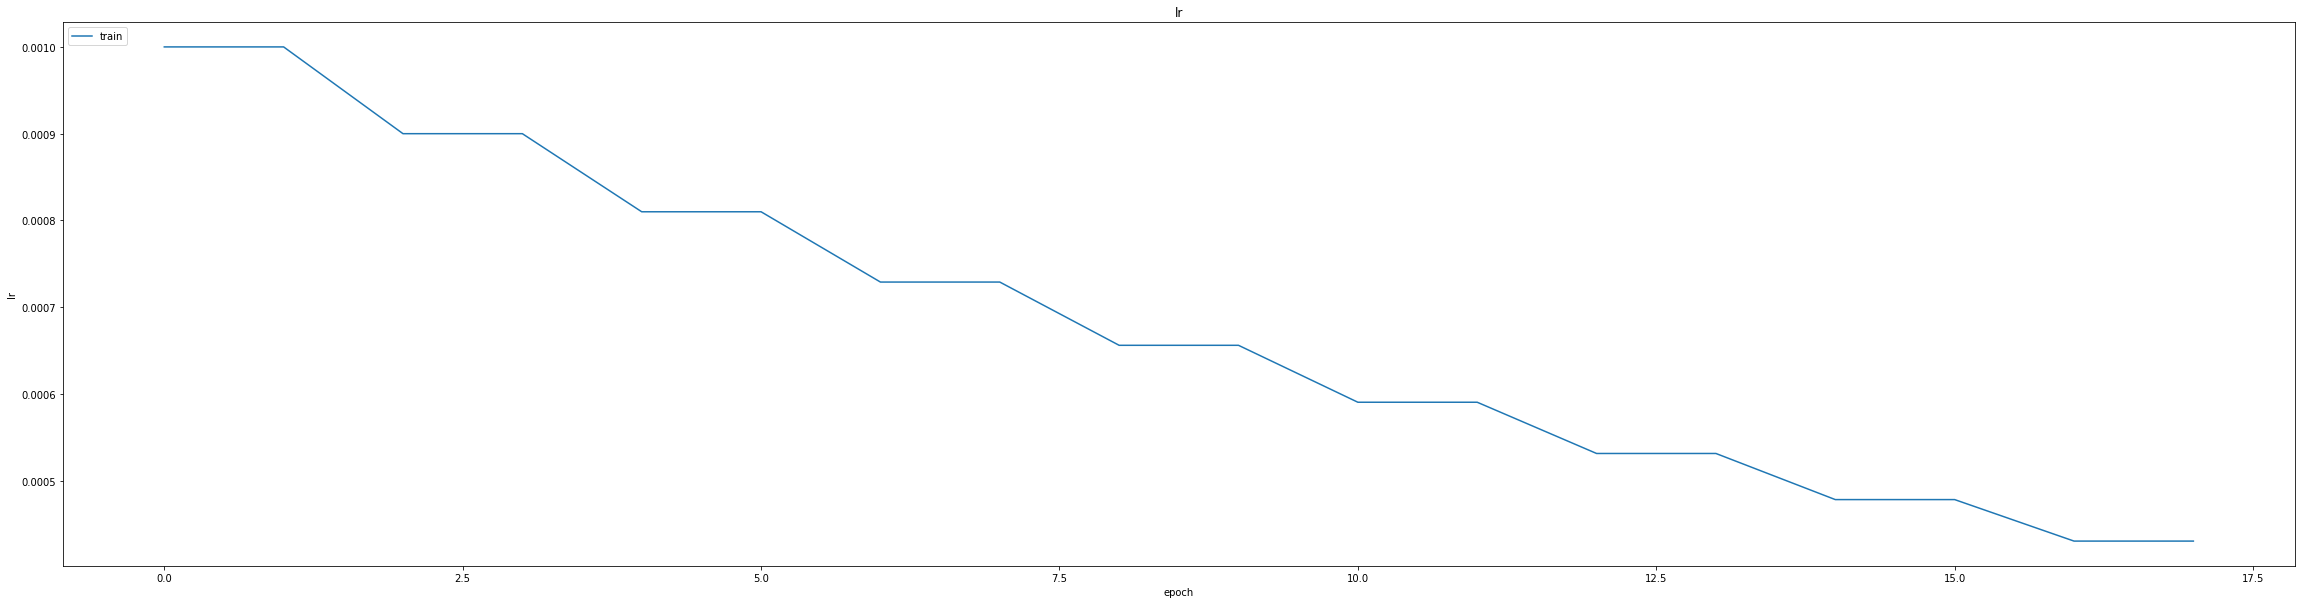

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.016948357224464417
0.02214287407696247
234/234 [==============================] - 7s 25ms/step
0.9803086494378562


234/234 [==============================] - 6s 25ms/step


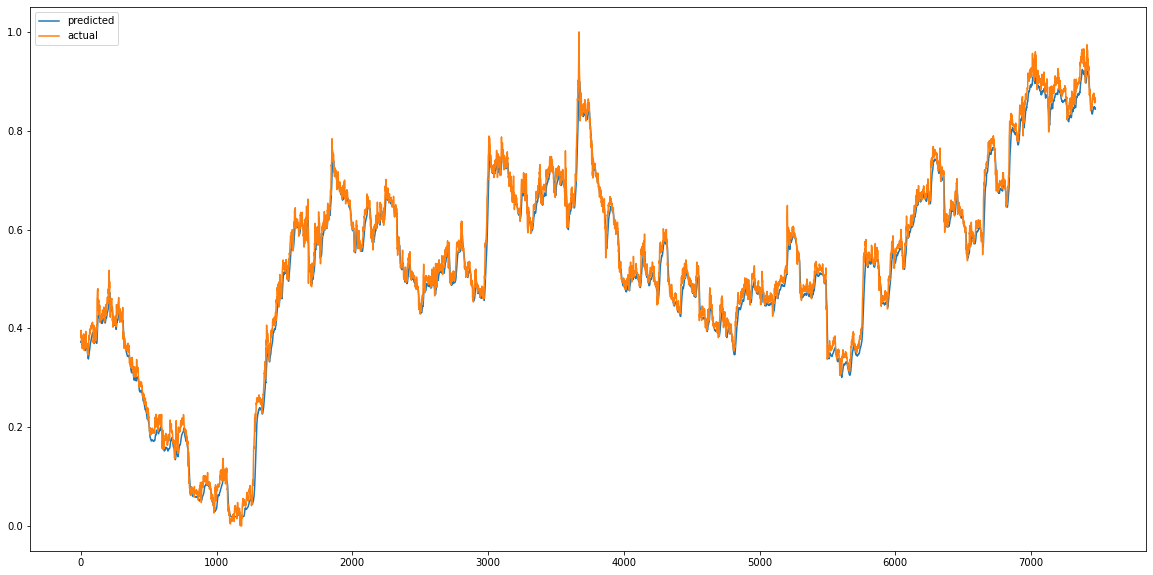

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CAD15minGRU.hdf5")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


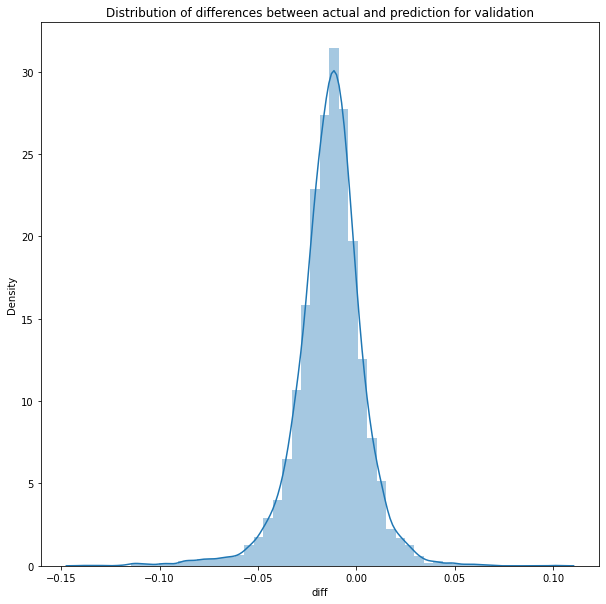

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

229/229 [==============================] - 6s 25ms/step


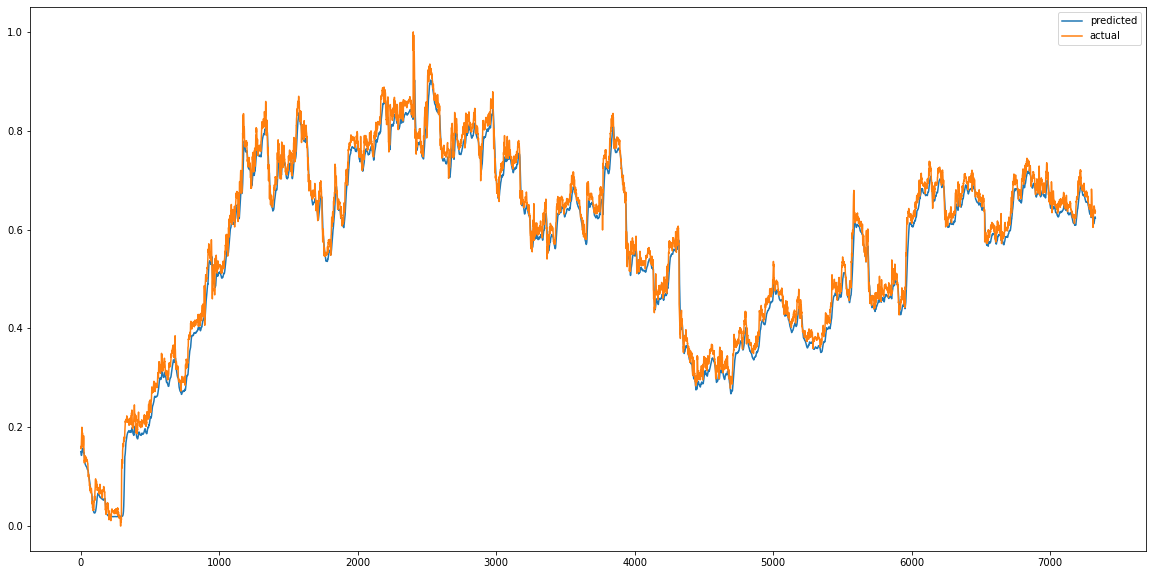

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


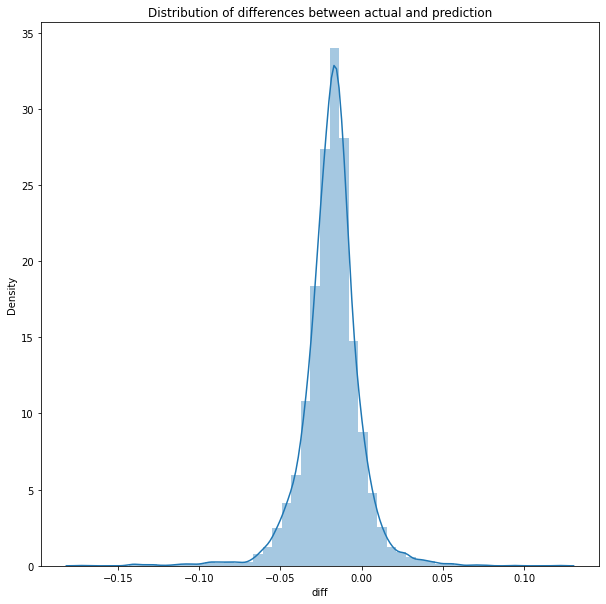

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
from math import sqrt

print('RMSE  :', sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

test_r2_scr = thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :',test_r2_scr)


predictions['diff'].describe()

MSE :  0.0006567702500855592
MAE :  0.02075828159101893
RMSE  : 0.025627529145150908
229/229 [==============================] - 6s 25ms/step
R2_Score  : 0.9829309629866118


count    7328.000000
mean       -0.018486
std         0.017751
min        -0.172785
25%        -0.026450
50%        -0.017598
75%        -0.009796
max         0.121533
Name: diff, dtype: float64

In [ ]:
model= thesis.GRU_BiLSTM_Model(x_train)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 24, 32)            4416      
                                                                 
 bidirectional_2 (Bidirectio  (None, 24, 256)          164864    
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 24, 256)           0         
                                                                 
 bidirectional_3 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dense_3 (Dense)             (None, 32)                4128      
                                                                 
 dense_4 (Dense)             (None, 16)               

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("weights.best.hdf5", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
464/464 [==============================] - ETA: 0s - loss: 210.2510 - mae: 1.8425 - mse: 210.2510 - root_mean_squared_error: 14.5000 - mape: 2510.5286
Epoch 1: val_mse improved from inf to 0.31860, saving model to weights.best.hdf5
464/464 [==============================] - 145s 292ms/step - loss: 210.2510 - mae: 1.8425 - mse: 210.2510 - root_mean_squared_error: 14.5000 - mape: 2510.5286 - val_loss: 0.3186 - val_mae: 0.5258 - val_mse: 0.3186 - val_root_mean_squared_error: 0.5644 - val_mape: 803.2307
Epoch 2/75
464/464 [==============================] - ETA: 0s - loss: 0.1542 - mae: 0.3419 - mse: 0.1542 - root_mean_squared_error: 0.3927 - mape: 198.4633
Epoch 2: val_mse improved from 0.31860 to 0.31816, saving model to weights.best.hdf5
464/464 [==============================] - 137s 296ms/step - loss: 0.1542 - mae: 0.3419 - mse: 0.1542 - root_mean_squared_error: 0.3927 - mape: 198.4633 - val_loss: 0.3182 - val_mae: 0.5254 - val_mse: 0.3182 - val_root_mean_squared_error: 0.56

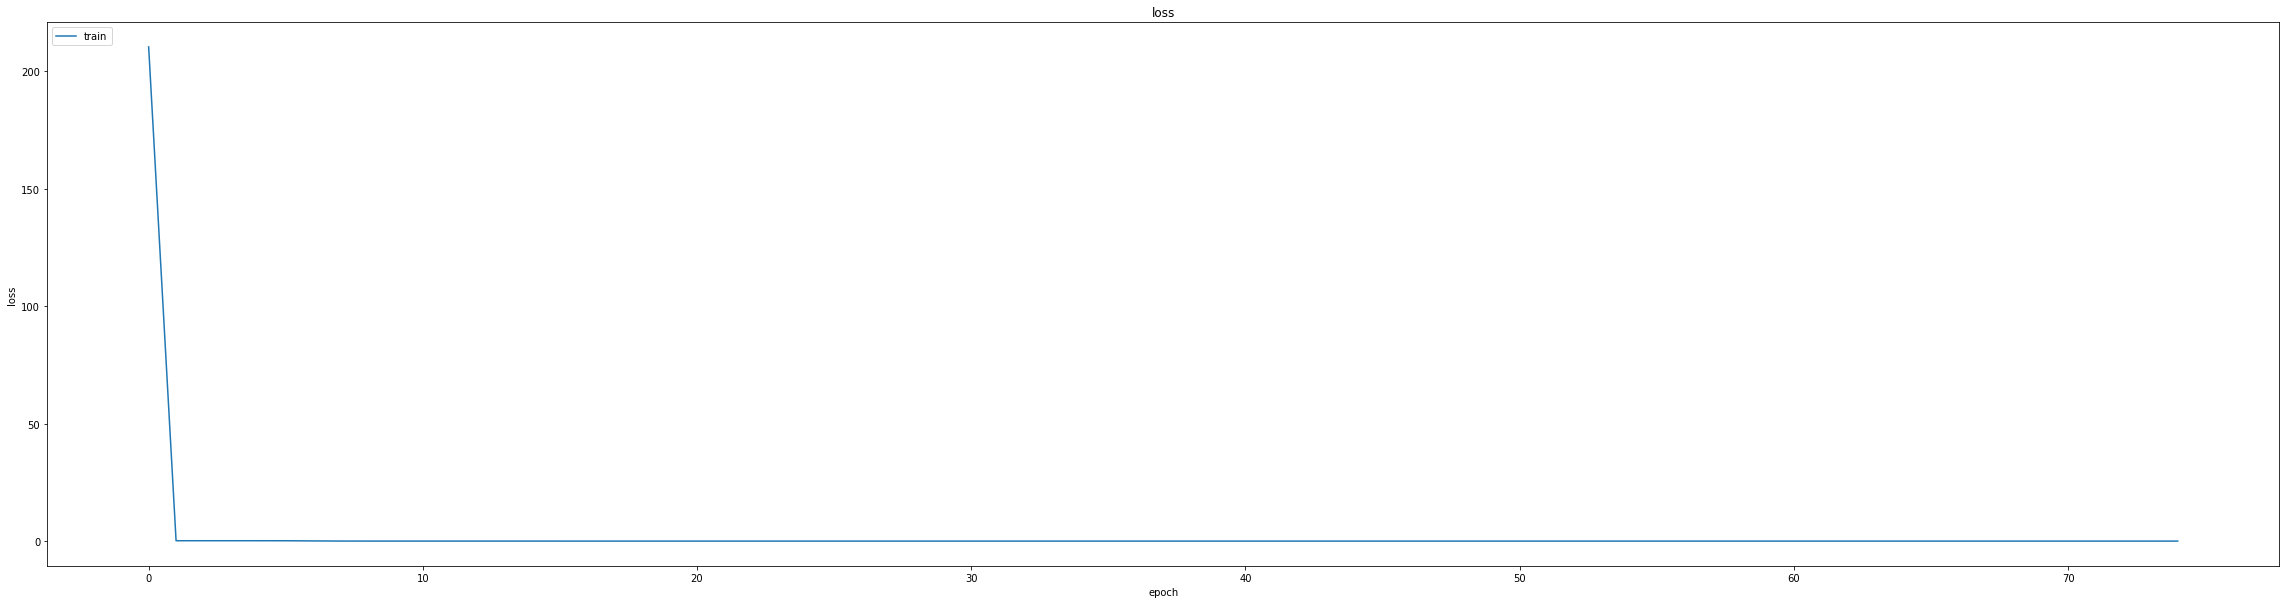

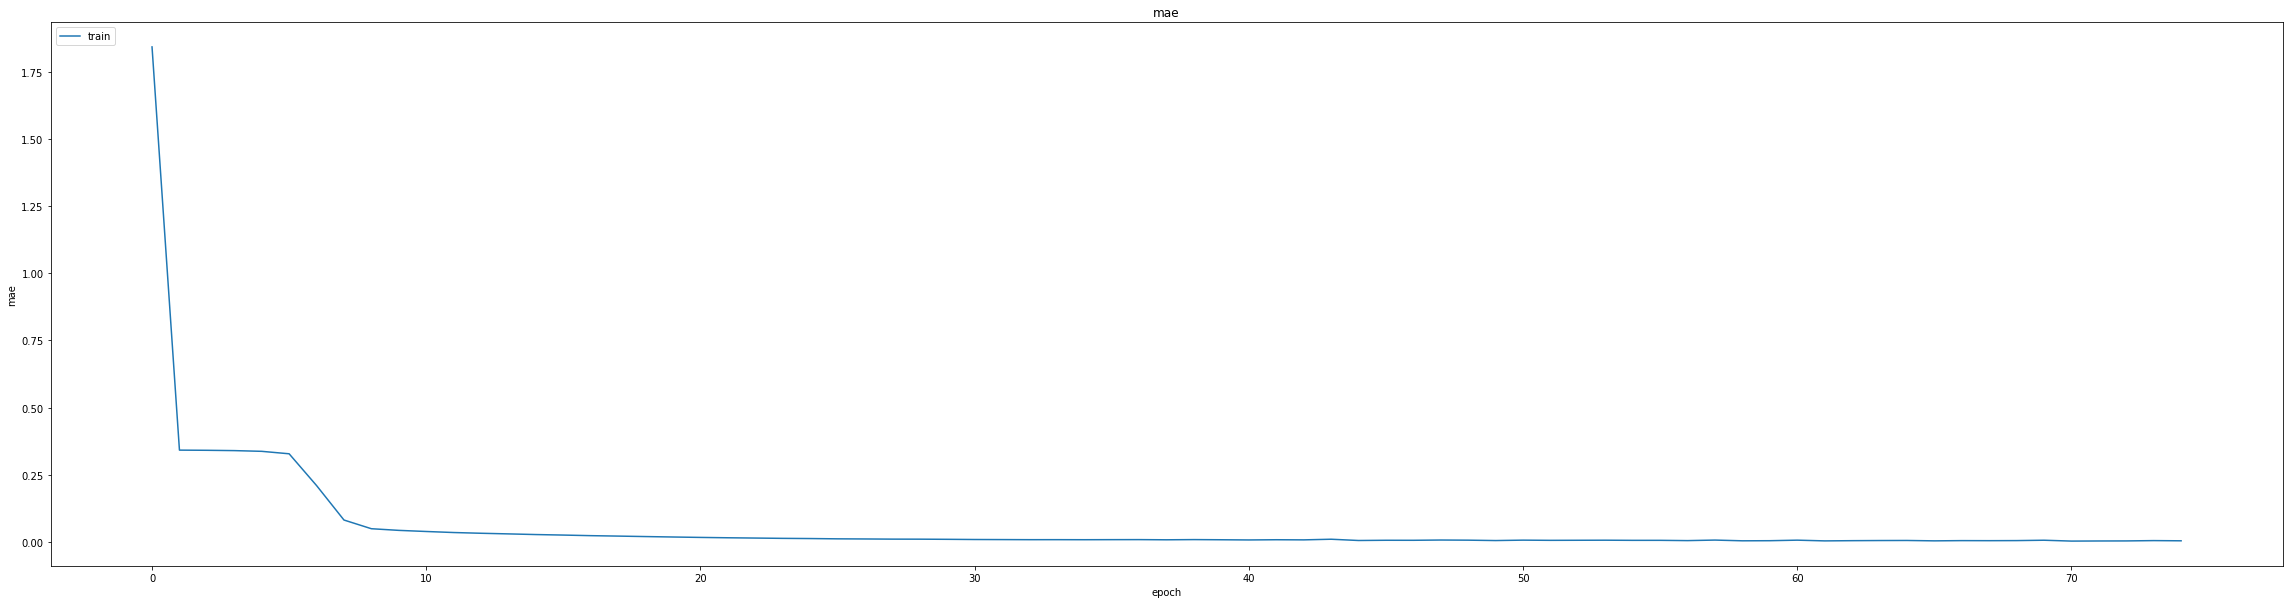

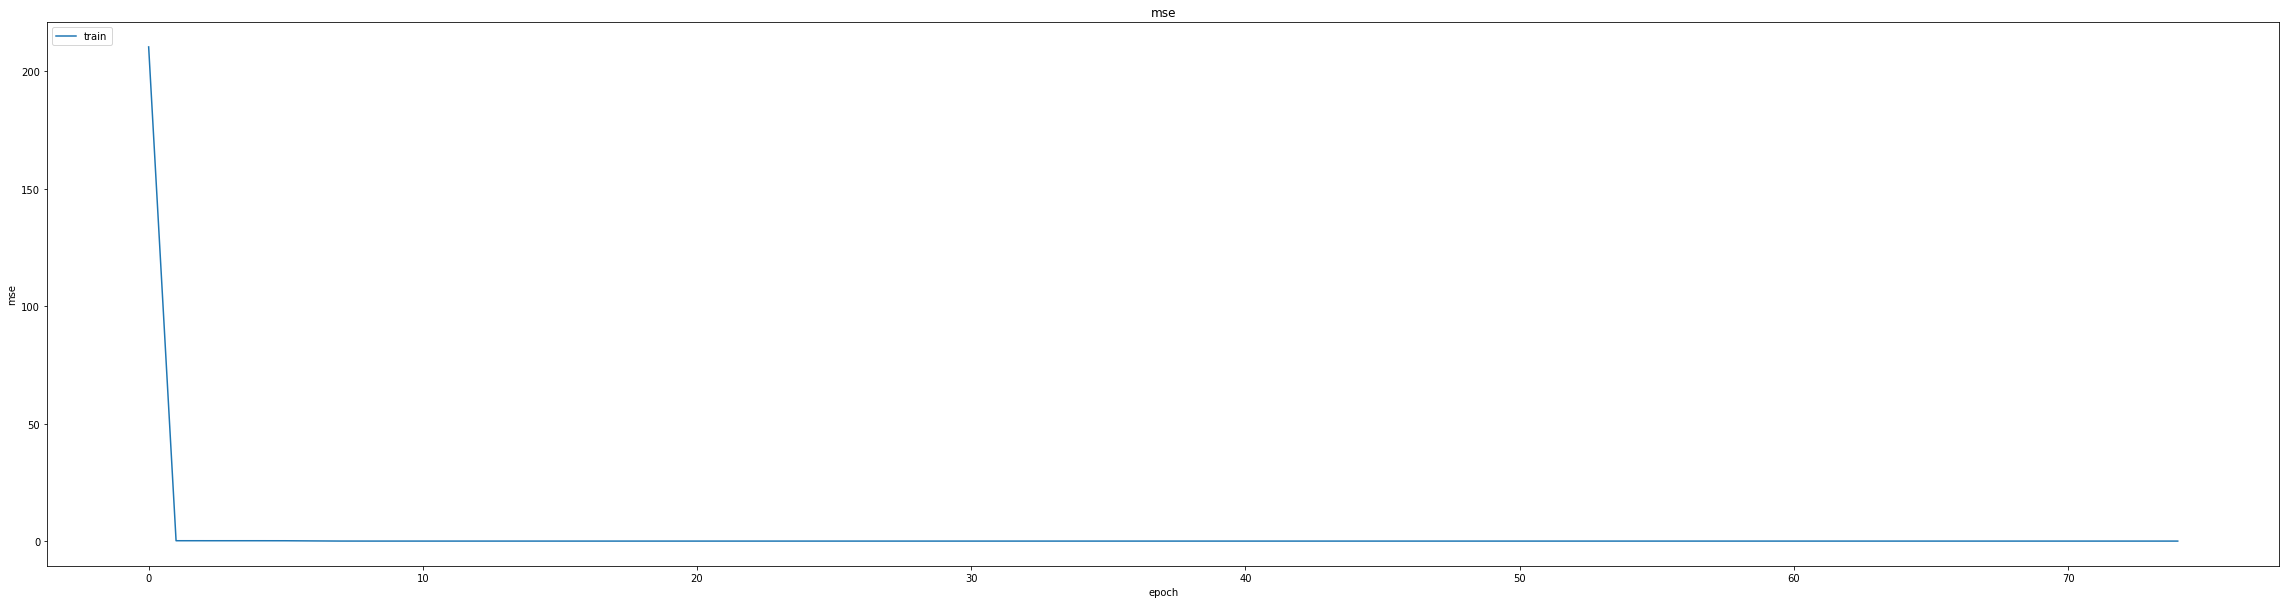

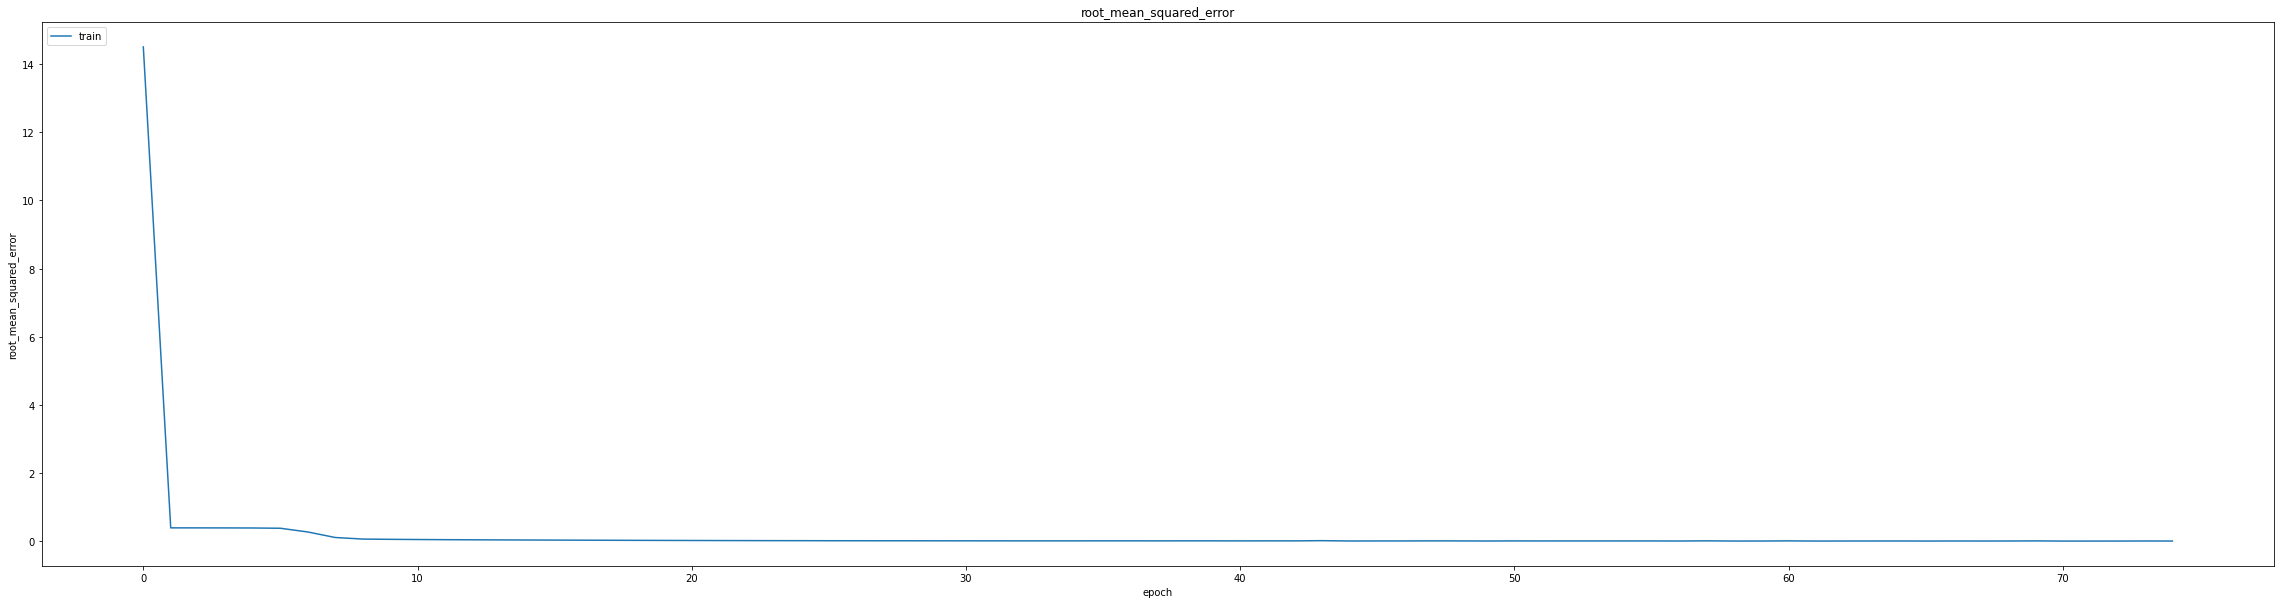

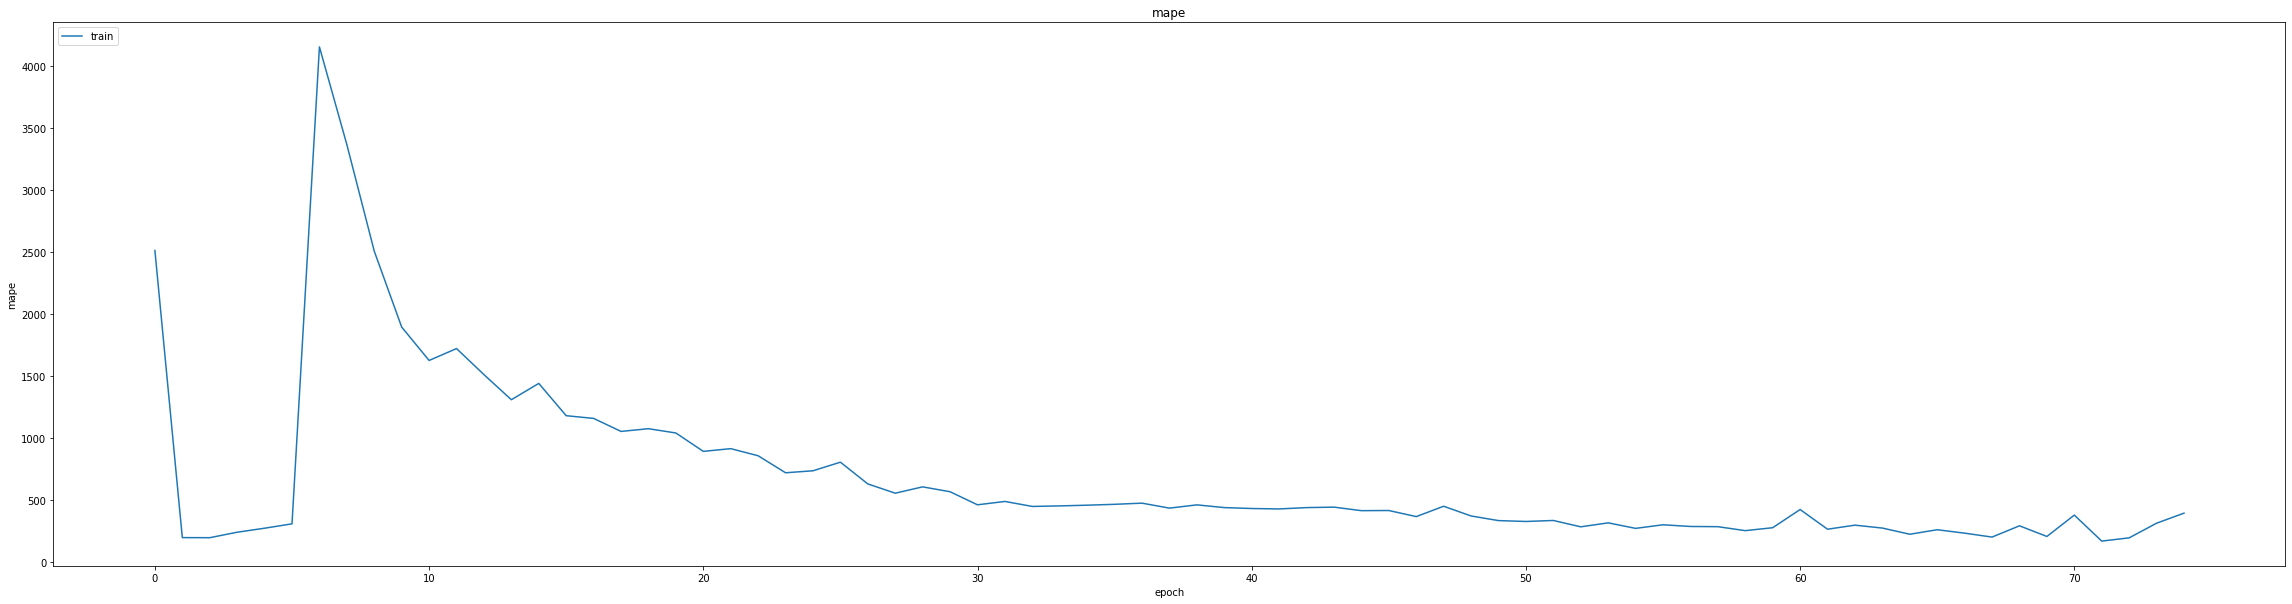

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.014817683957517147
0.018240418285131454
234/234 [==============================] - 10s 35ms/step
0.9730066234737769


In [ ]:
model.load_weights("weights.best.hdf5")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
464/464 [==============================] - ETA: 0s - loss: 1.5114e-04 - mae: 0.0051 - mse: 1.5114e-04 - root_mean_squared_error: 0.0123 - mape: 196.4209
Epoch 1: val_mse did not improve from 0.00033
464/464 [==============================] - 137s 275ms/step - loss: 1.5114e-04 - mae: 0.0051 - mse: 1.5114e-04 - root_mean_squared_error: 0.0123 - mape: 196.4209 - val_loss: 7.6845e-04 - val_mae: 0.0249 - val_mse: 7.6845e-04 - val_root_mean_squared_error: 0.0277 - val_mape: 1530.1704 - lr: 0.0010
Epoch 2/25
464/464 [==============================] - ETA: 0s - loss: 2.2377e-05 - mae: 0.0034 - mse: 2.2377e-05 - root_mean_squared_error: 0.0047 - mape: 216.7755
Epoch 2: val_mse did not improve from 0.00033
464/464 [==============================] - 130s 280ms/step - loss: 2.2377e-05 - mae: 0.0034 - mse: 2.2377e-05 - root_mean_squared_error: 0.0047 - mape: 216.7755 - val_loss: 9.0190e-04 - val_mae: 0.0272 - val_mse: 9.0190e-04 - val_root_mean_squared_error: 0.0300 - val_mape: 1280.1763

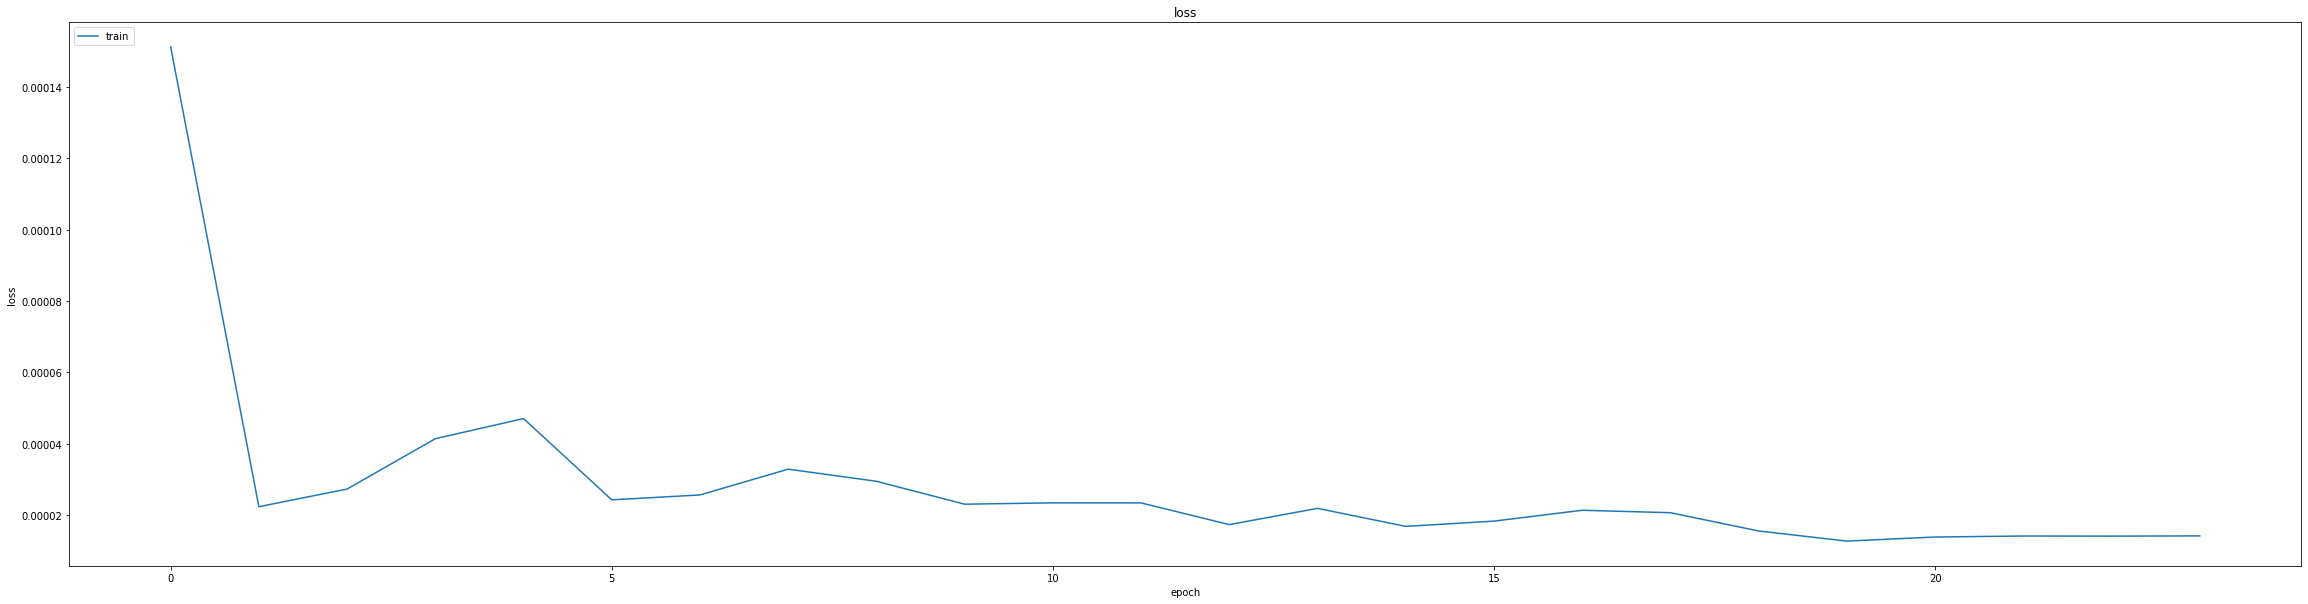

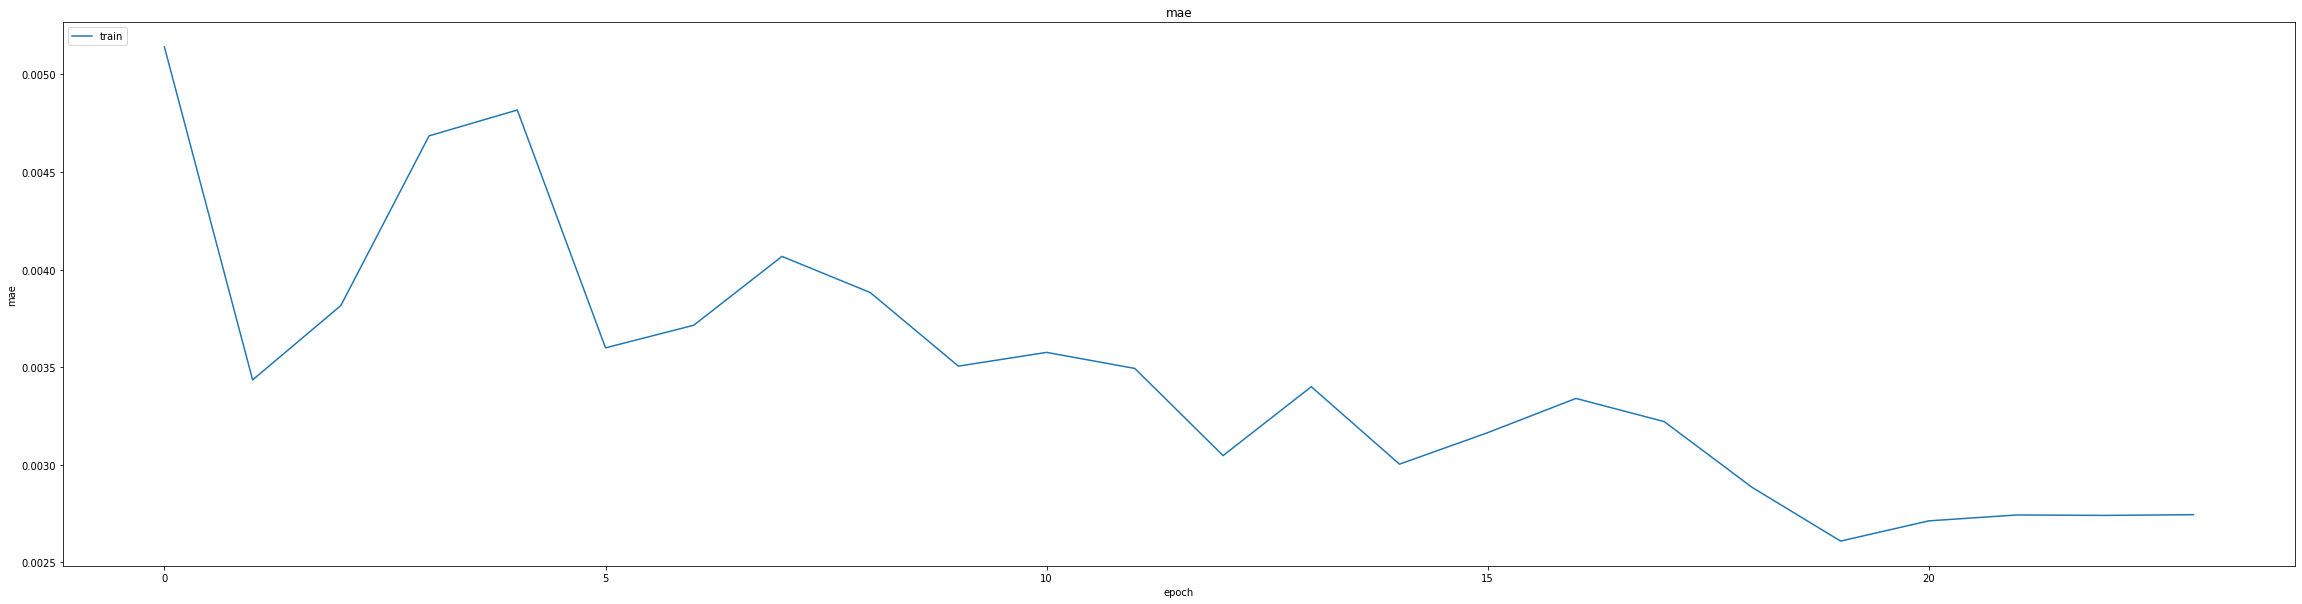

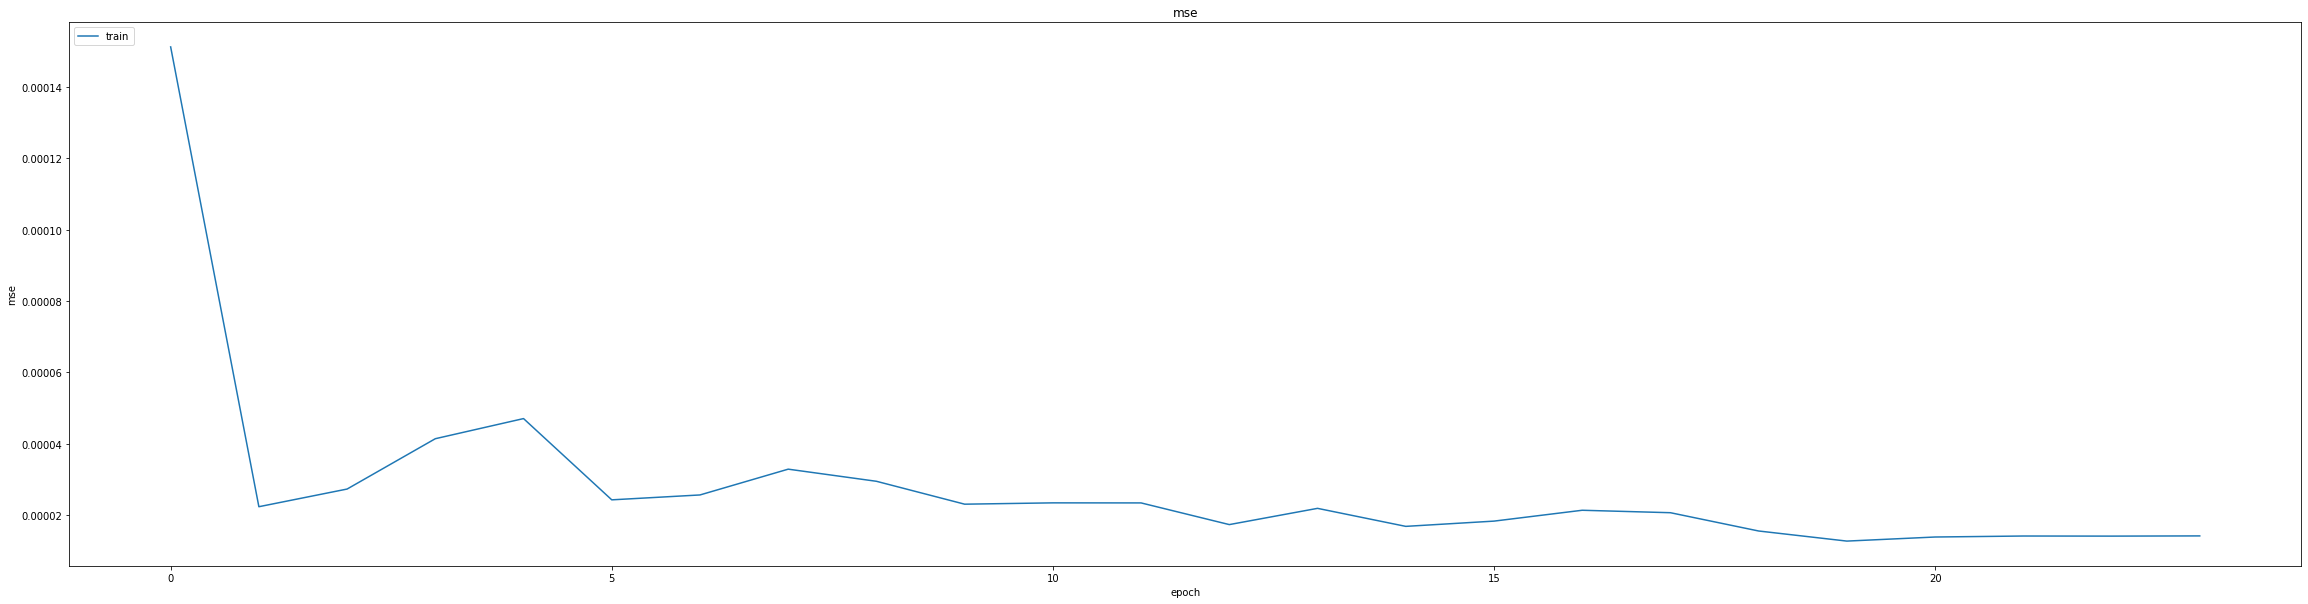

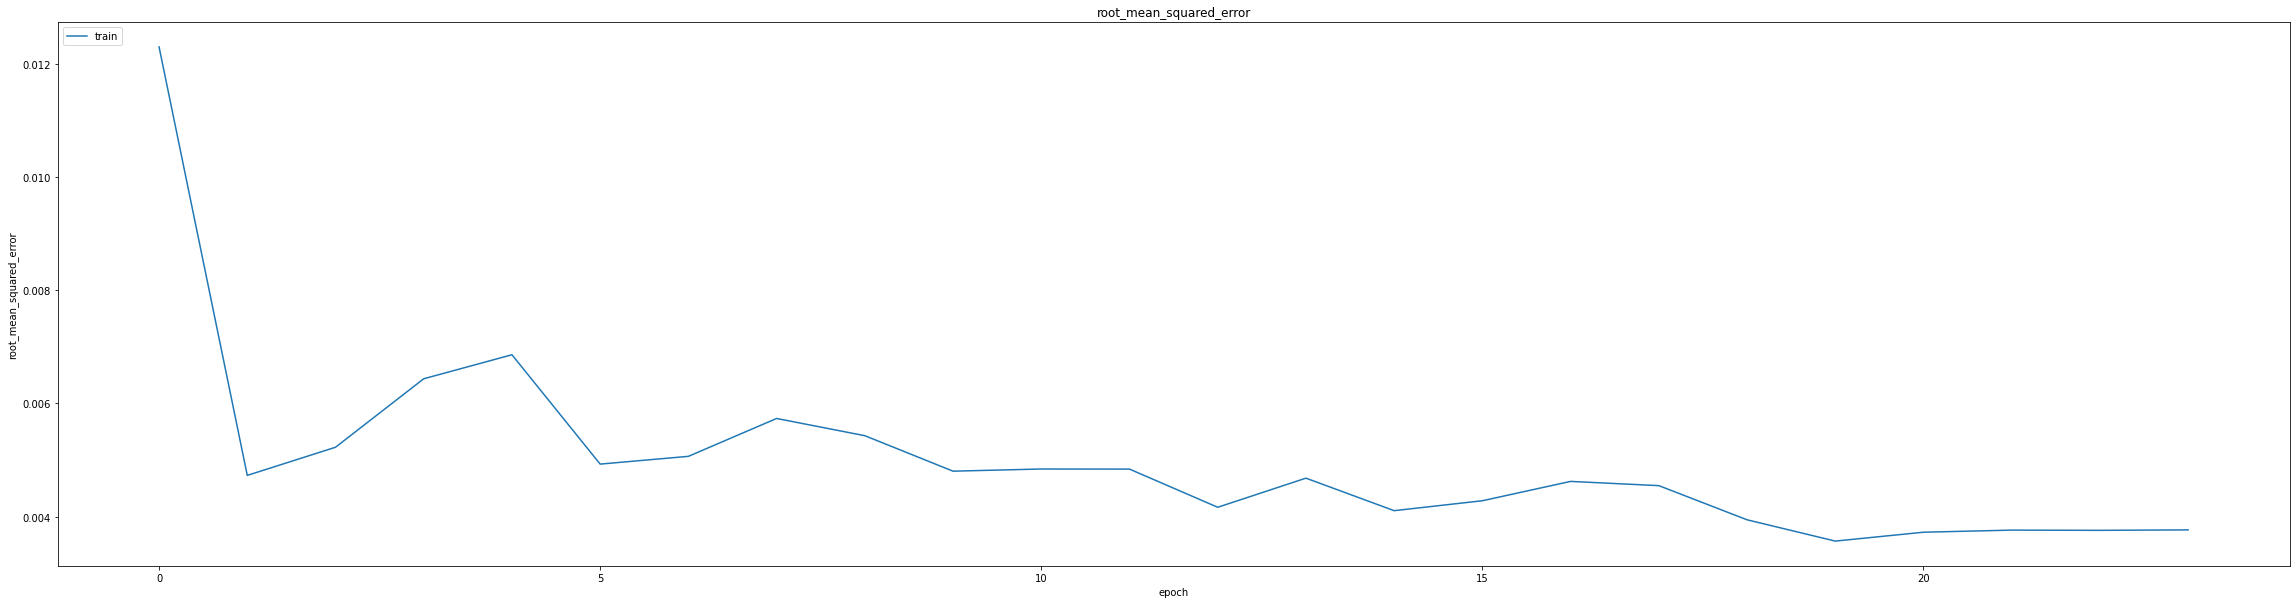

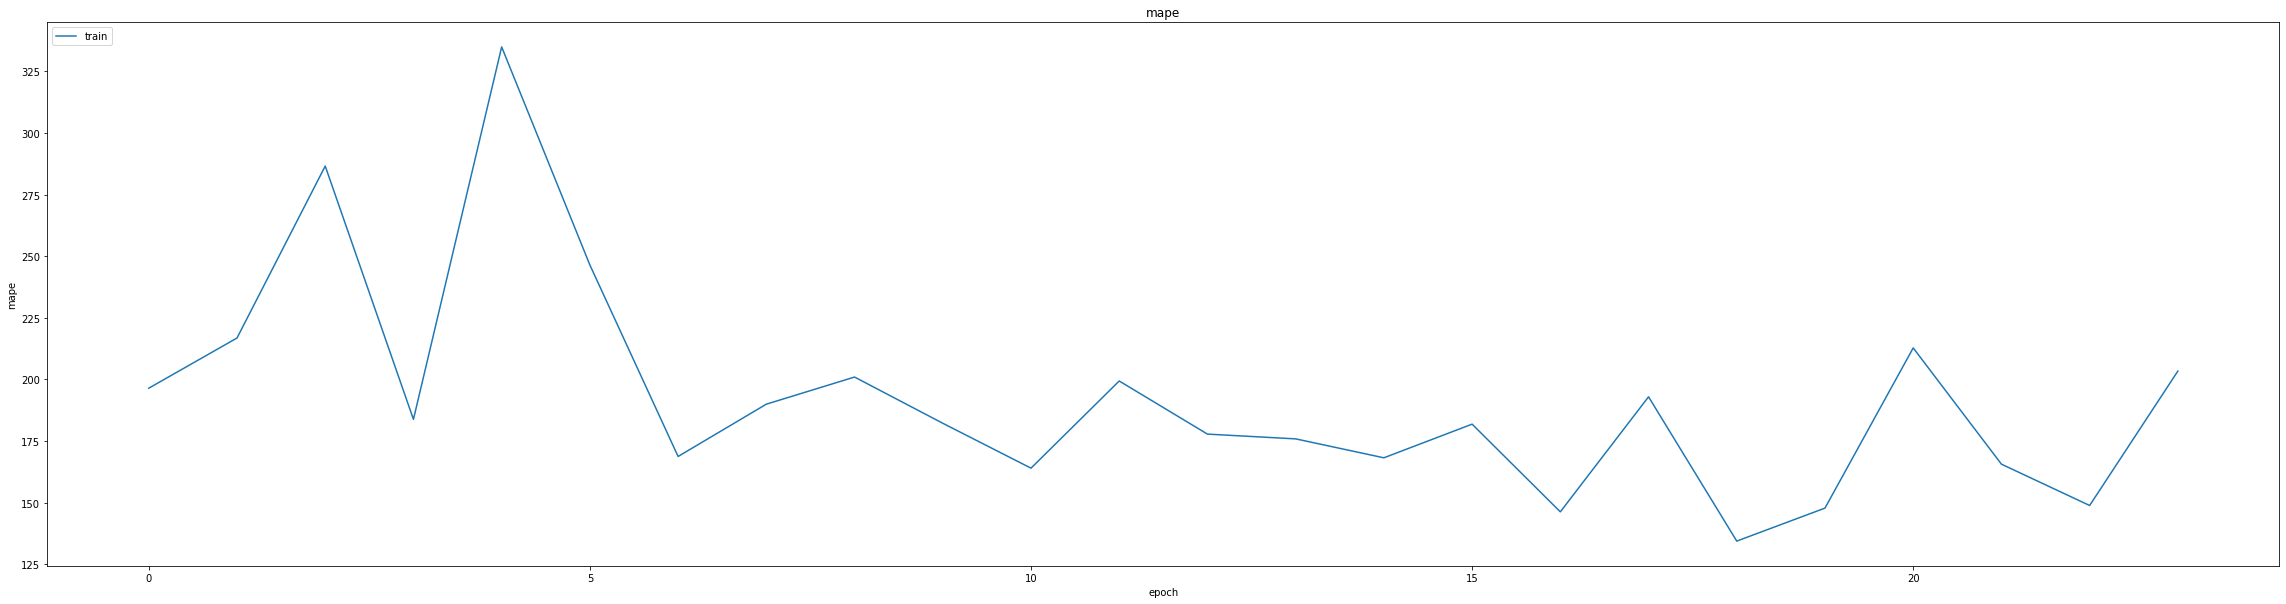

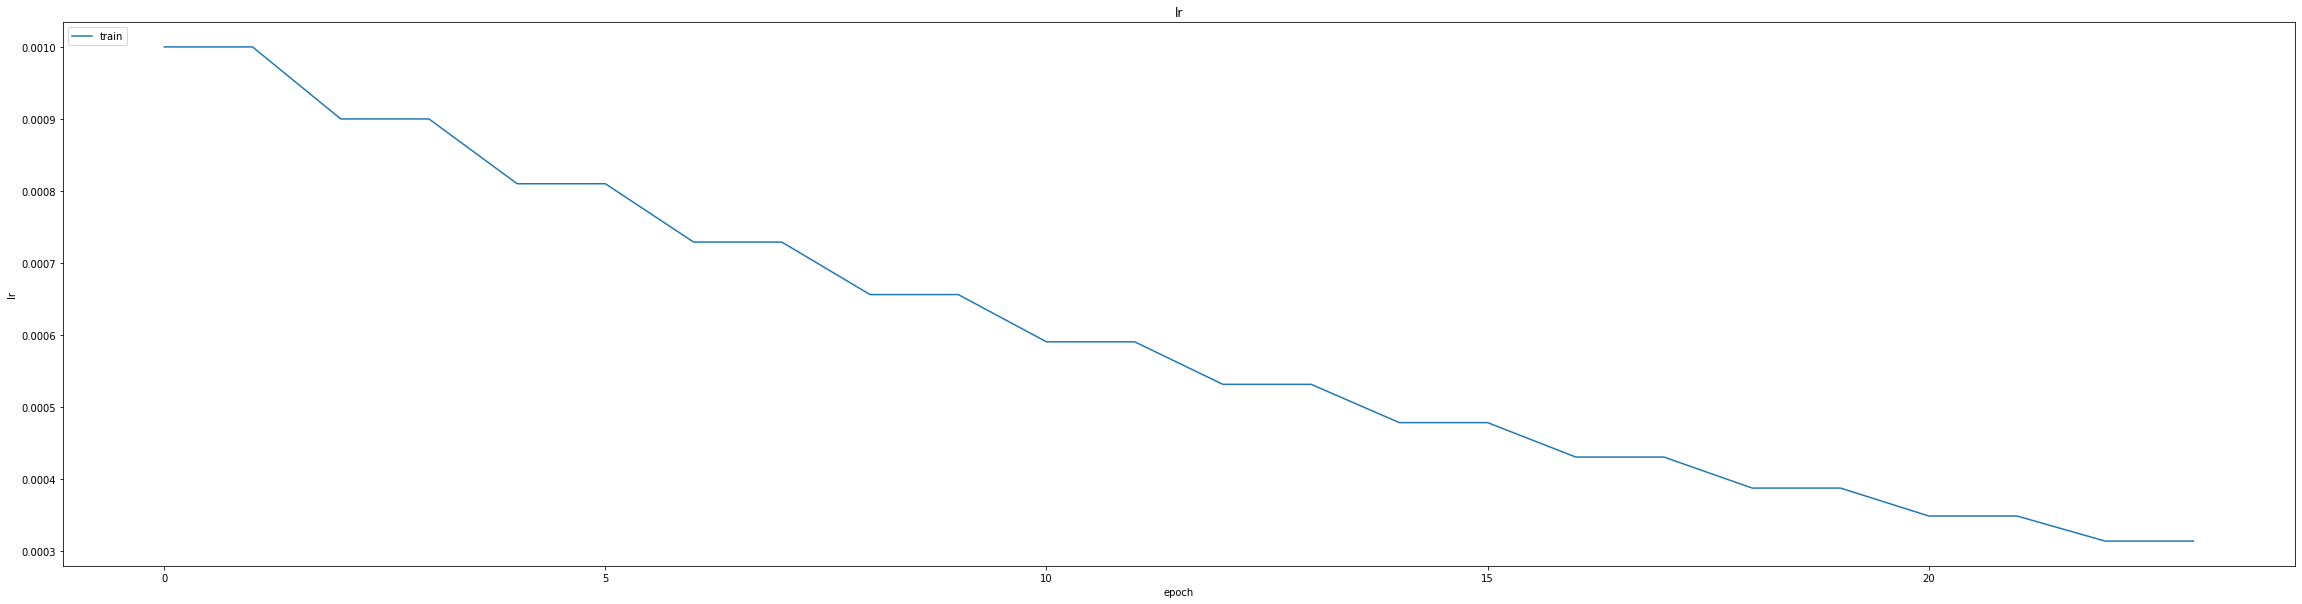

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.022472186014056206
0.025212807580828667
234/234 [==============================] - 10s 36ms/step
-109.86689044878105


234/234 [==============================] - 8s 36ms/step


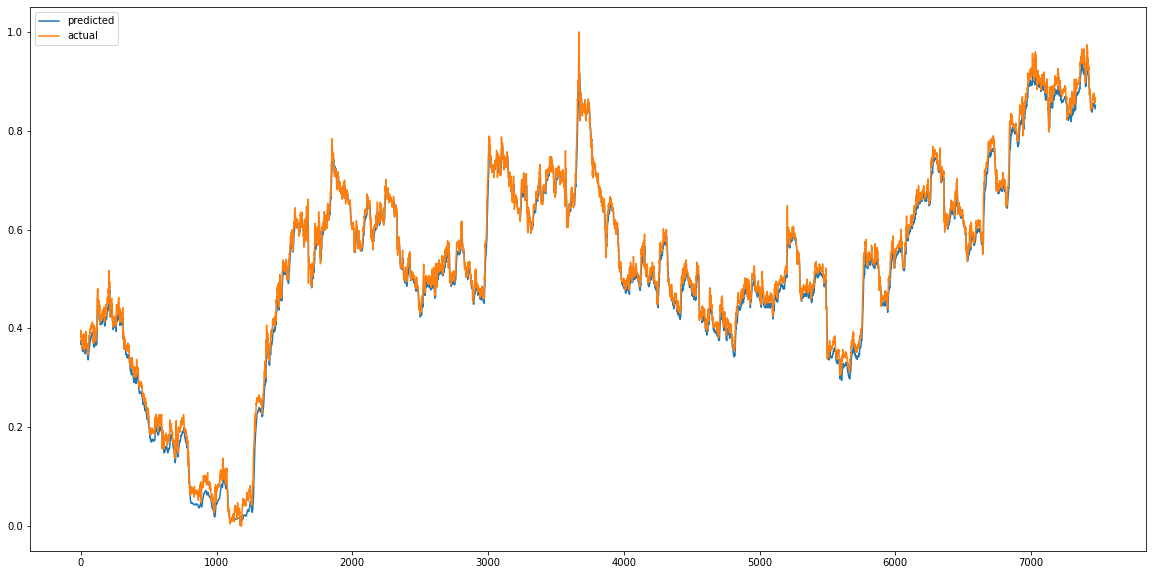

In [ ]:
model.load_weights("weights.best.hdf5")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


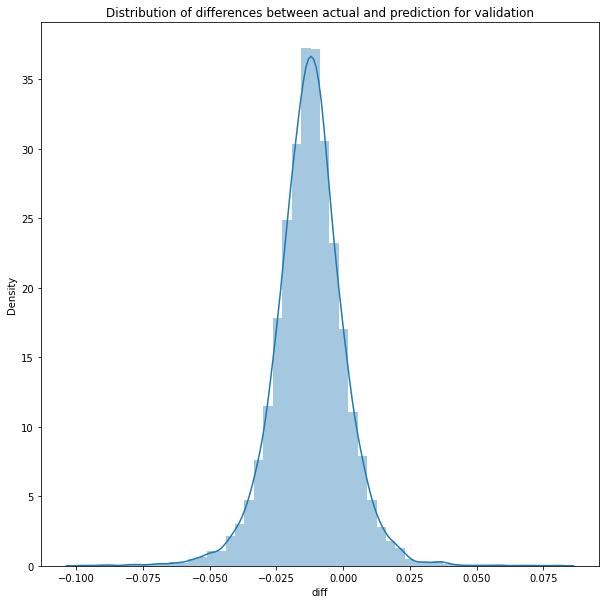

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

229/229 [==============================] - 8s 37ms/step


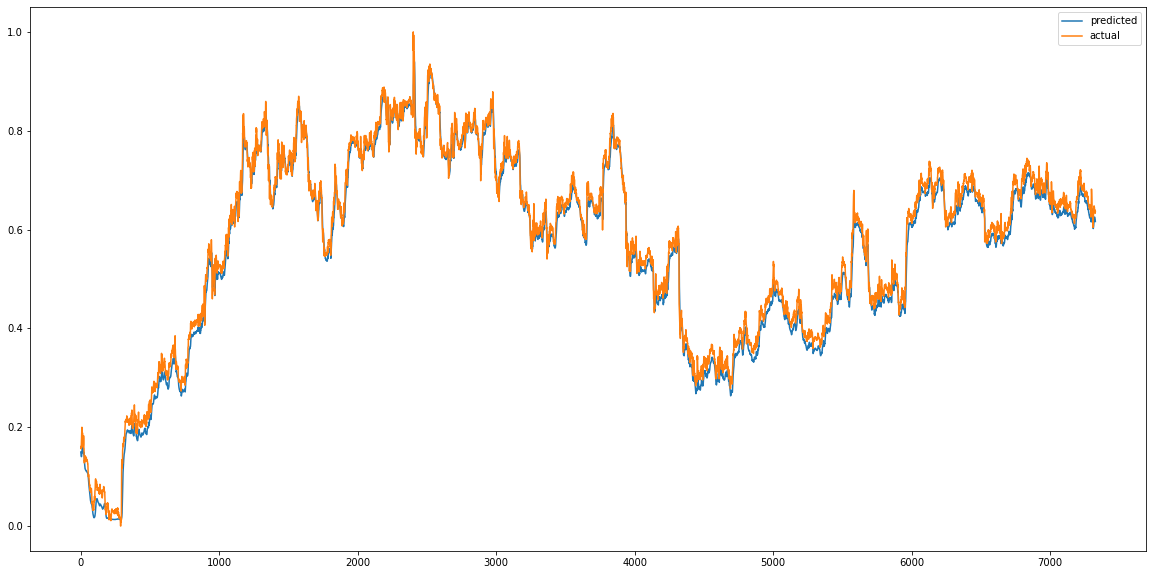

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


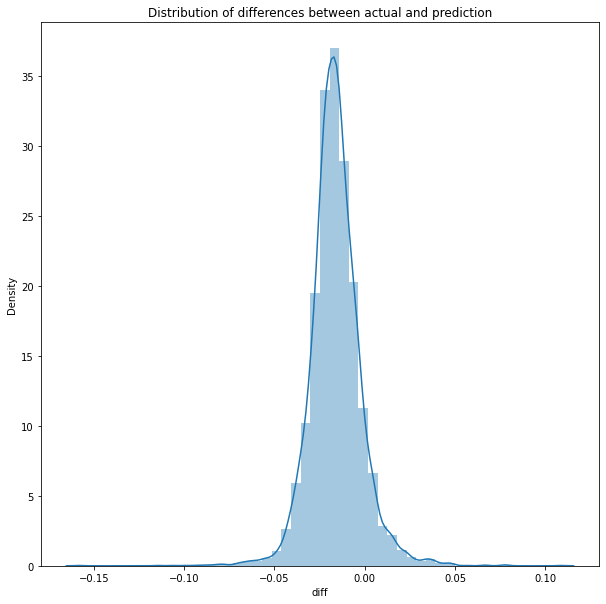

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
from math import sqrt

print('RMSE  :', sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

test_r2_scr = thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :',test_r2_scr)


predictions['diff'].describe()

MSE :  0.00046035660429010914
MAE :  0.018181569123687426
RMSE  : 0.021455922359341933
229/229 [==============================] - 8s 36ms/step
R2_Score  : 0.9880356274836889


count    7328.000000
mean       -0.016119
std         0.014162
min        -0.158047
25%        -0.023661
50%        -0.016658
75%        -0.008830
max         0.108527
Name: diff, dtype: float64

In [ ]:
model= thesis.GRU_LSTM_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 24, 32)            4416      
                                                                 
 lstm (LSTM)                 (None, 24, 256)           295936    
                                                                 
 dropout (Dropout)           (None, 24, 256)           0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                82176     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 1

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value

early_stopping = EarlyStopping(monitor='val_mse', patience=30)


In [ ]:
from keras.callbacks import ModelCheckpoint


checkpoint = ModelCheckpoint("weights.best.hdf5", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

In [ ]:
Epochs=75
Batch_size= 128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
464/464 [==============================] - ETA: 0s - loss: 385.5311 - mae: 2.6368 - mse: 385.5311 - root_mean_squared_error: 19.6349 - mape: 7112.2461
Epoch 1: val_mse improved from inf to 0.09016, saving model to weights.best.hdf5
464/464 [==============================] - 148s 306ms/step - loss: 385.5311 - mae: 2.6368 - mse: 385.5311 - root_mean_squared_error: 19.6349 - mape: 7112.2461 - val_loss: 0.0902 - val_mae: 0.2630 - val_mse: 0.0902 - val_root_mean_squared_error: 0.3003 - val_mape: 41785.2539
Epoch 2/75
464/464 [==============================] - ETA: 0s - loss: 0.0377 - mae: 0.1547 - mse: 0.0377 - root_mean_squared_error: 0.1942 - mape: 6205.4219
Epoch 2: val_mse improved from 0.09016 to 0.07910, saving model to weights.best.hdf5
464/464 [==============================] - 136s 294ms/step - loss: 0.0377 - mae: 0.1547 - mse: 0.0377 - root_mean_squared_error: 0.1942 - mape: 6205.4219 - val_loss: 0.0791 - val_mae: 0.2433 - val_mse: 0.0791 - val_root_mean_squared_error: 

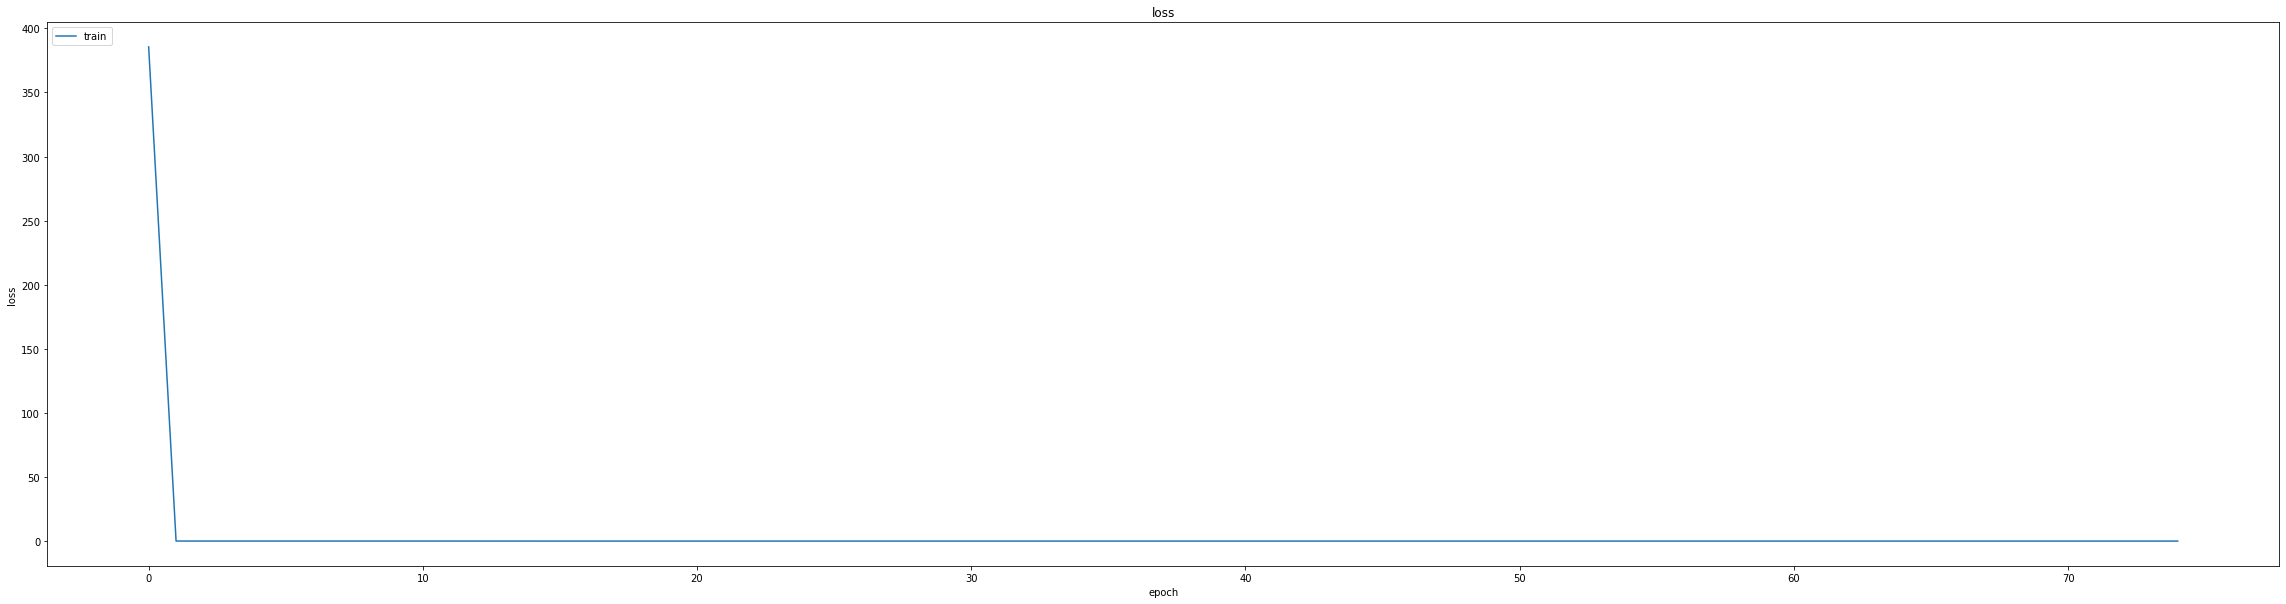

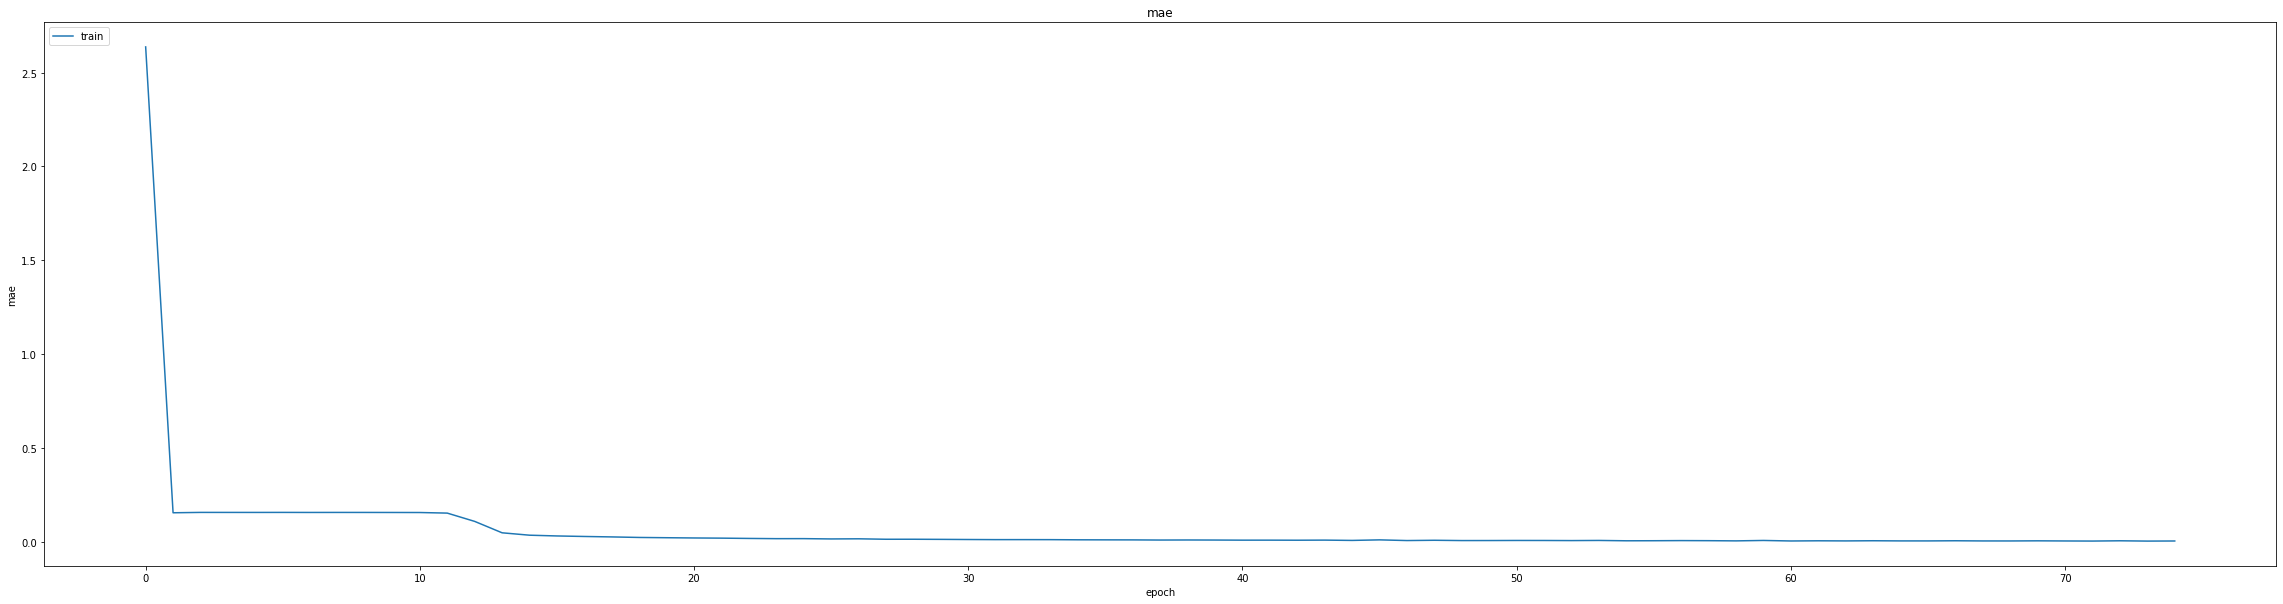

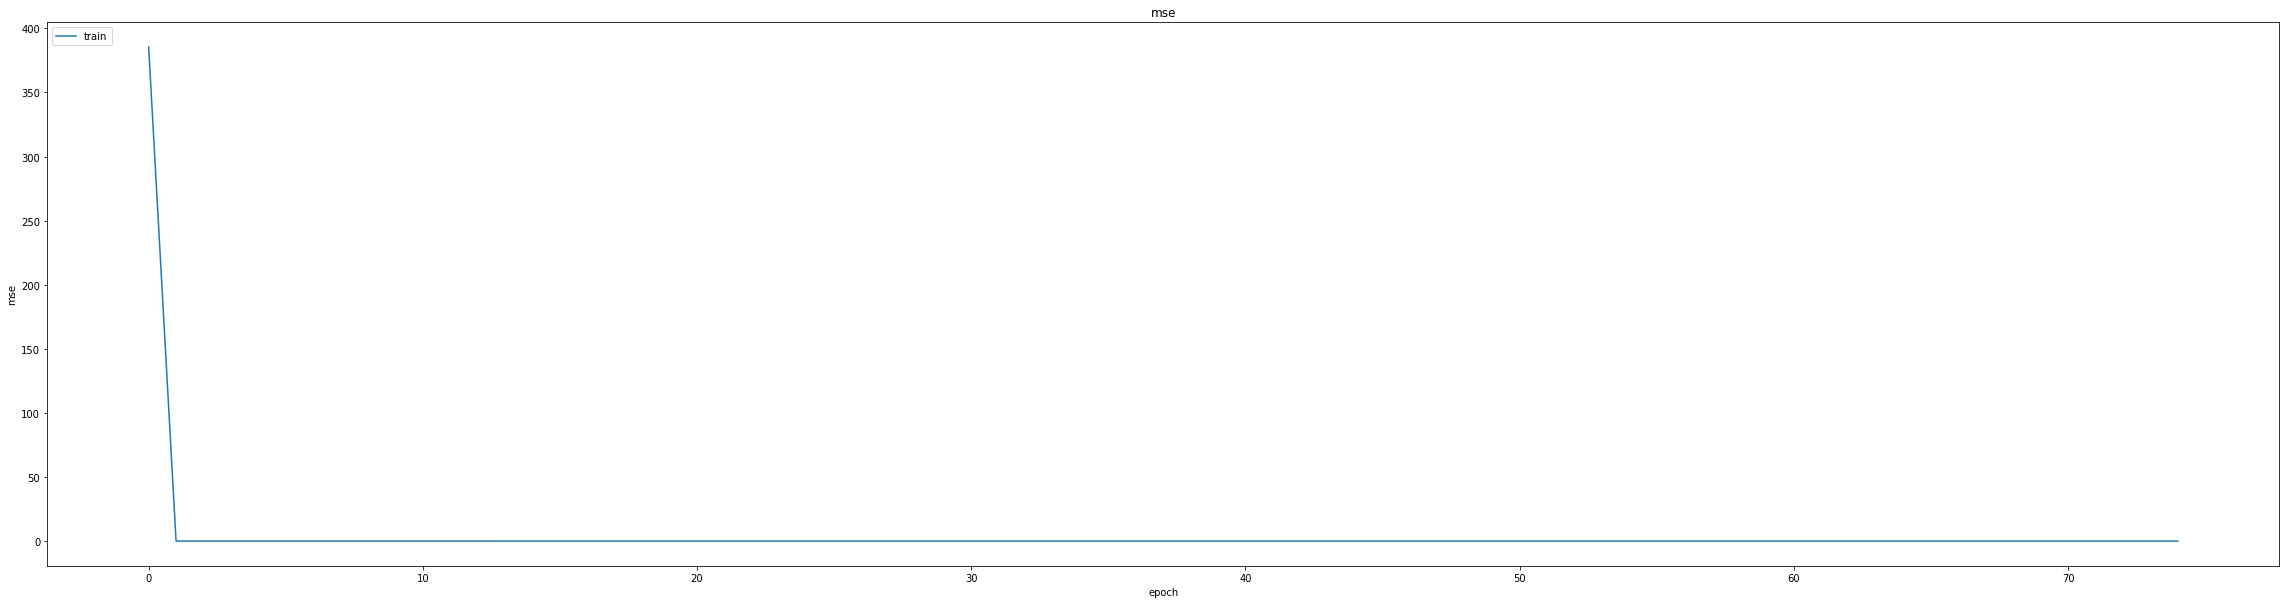

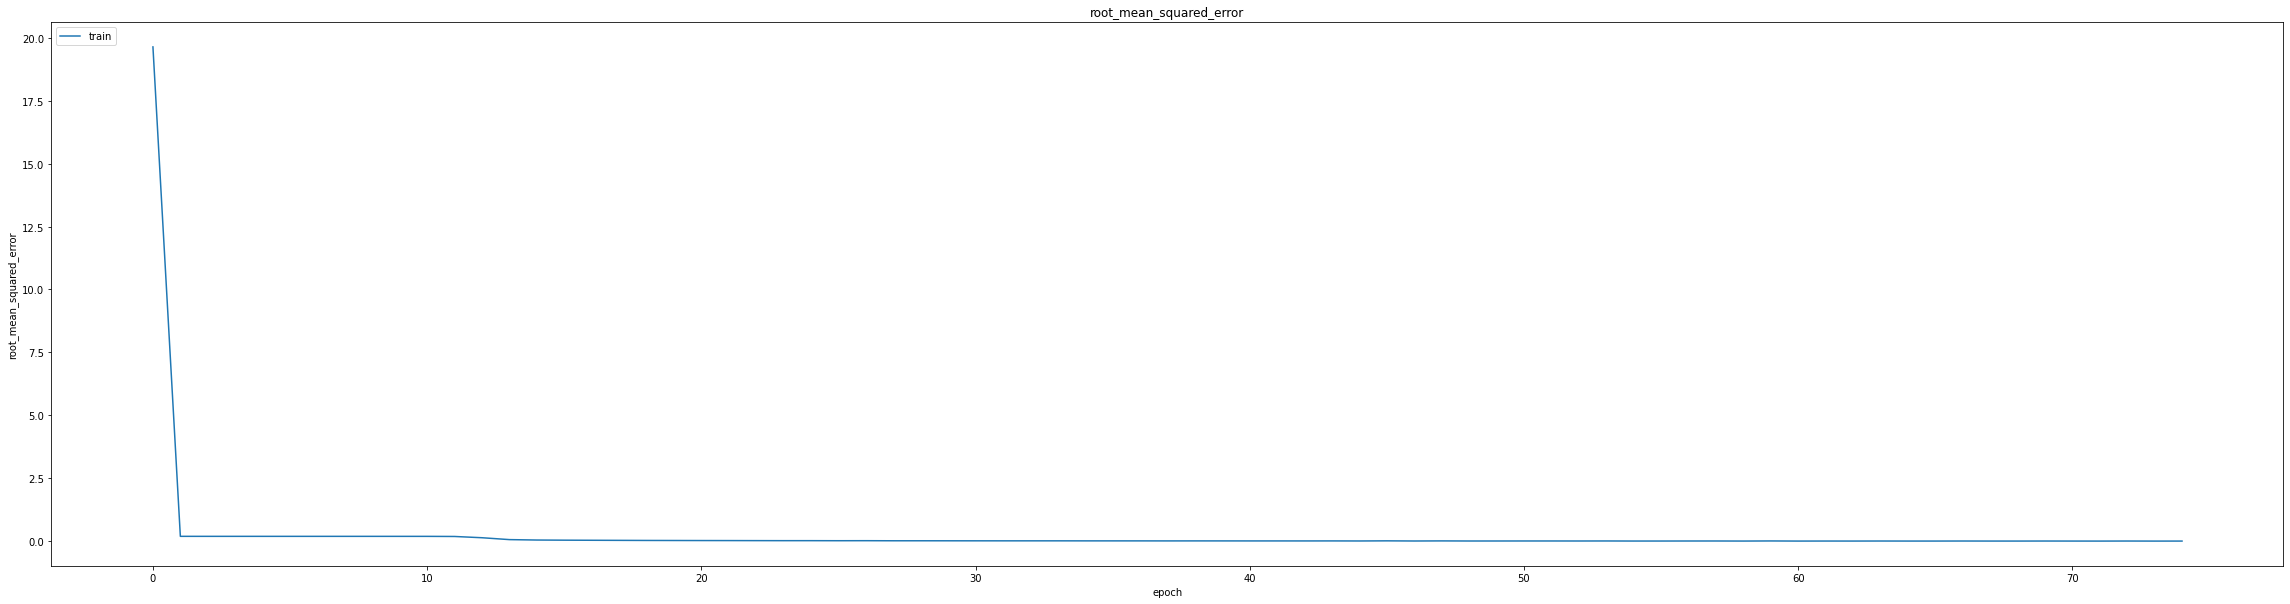

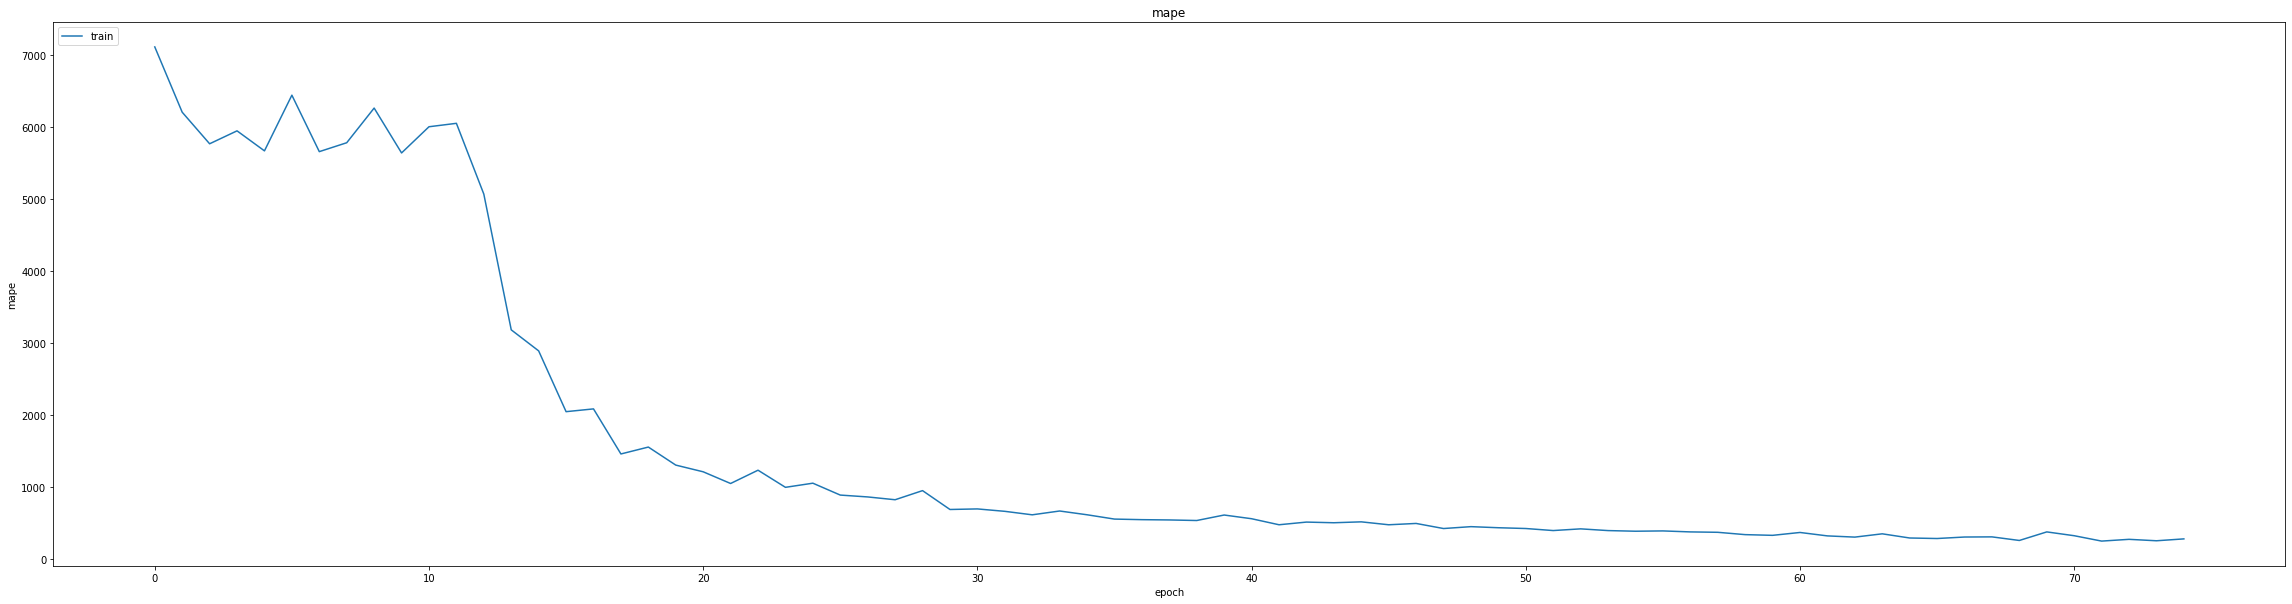

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['var_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.014838128350675106
0.01879776641726494
234/234 [==============================] - 13s 42ms/step
0.9790009720263959


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
model.load_weights("weights.best.hdf5")

In [ ]:
early_stopping = EarlyStopping(monitor='val_mse', patience=15)
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]
Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
464/464 [==============================] - ETA: 0s - loss: 1.4309e-04 - mae: 0.0052 - mse: 1.4309e-04 - root_mean_squared_error: 0.0120 - mape: 312.3499
Epoch 1: val_mse did not improve from 0.00035
464/464 [==============================] - 149s 303ms/step - loss: 1.4309e-04 - mae: 0.0052 - mse: 1.4309e-04 - root_mean_squared_error: 0.0120 - mape: 312.3499 - val_loss: 6.5099e-04 - val_mae: 0.0218 - val_mse: 6.5099e-04 - val_root_mean_squared_error: 0.0255 - val_mape: 2079.9905 - lr: 0.0010
Epoch 2/25
464/464 [==============================] - ETA: 0s - loss: 2.1860e-05 - mae: 0.0034 - mse: 2.1860e-05 - root_mean_squared_error: 0.0047 - mape: 284.7004
Epoch 2: val_mse did not improve from 0.00035
464/464 [==============================] - 135s 292ms/step - loss: 2.1860e-05 - mae: 0.0034 - mse: 2.1860e-05 - root_mean_squared_error: 0.0047 - mape: 284.7004 - val_loss: 9.5638e-04 - val_mae: 0.0276 - val_mse: 9.5638e-04 - val_root_mean_squared_error: 0.0309 - val_mape: 1963.6205

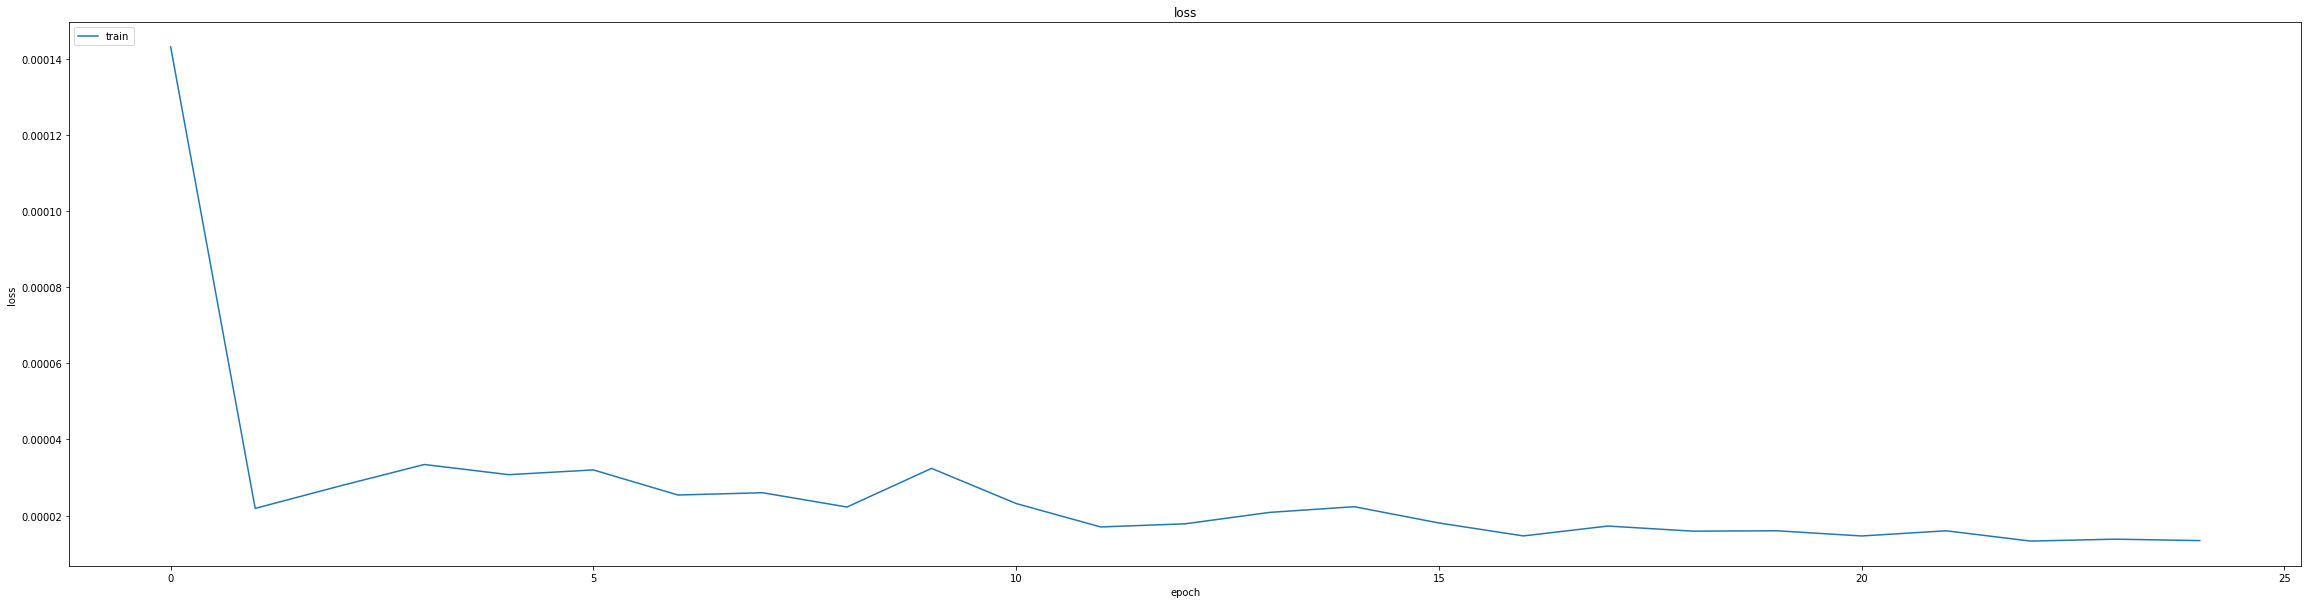

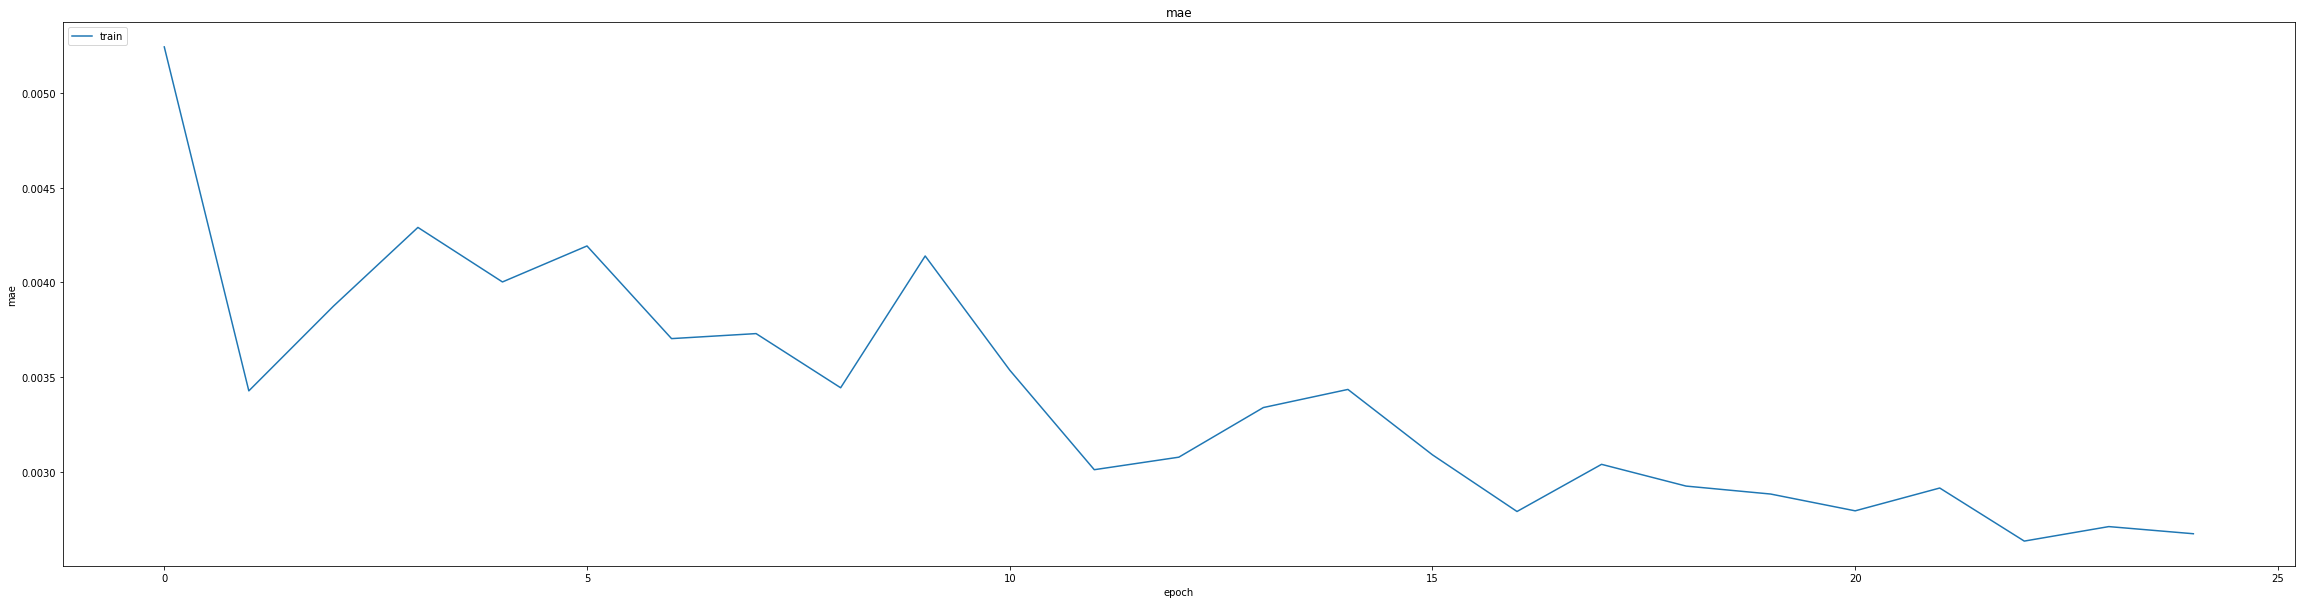

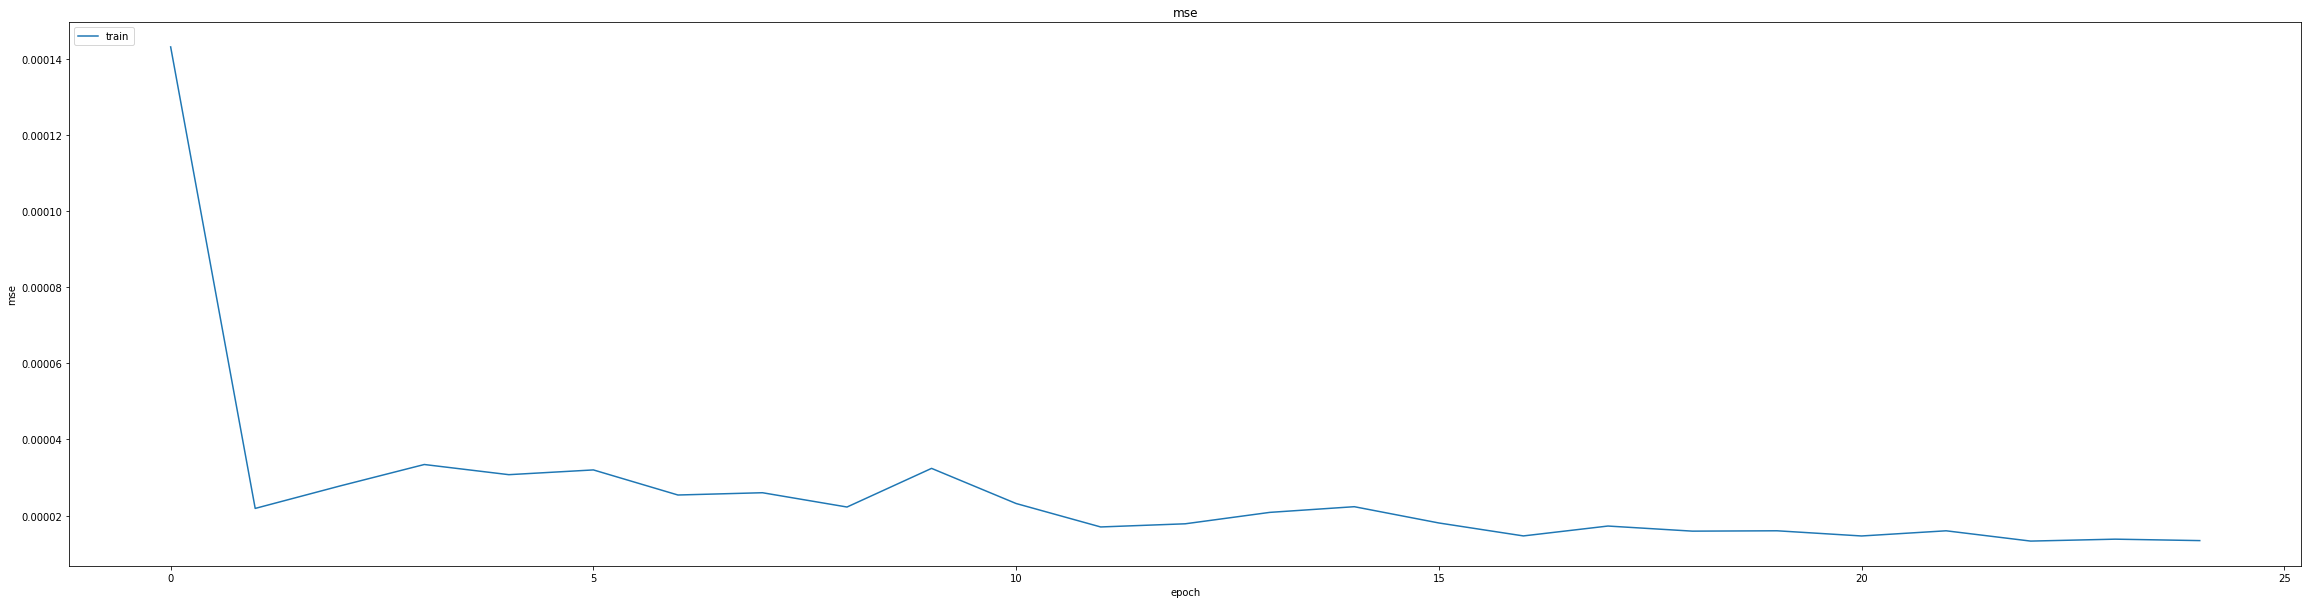

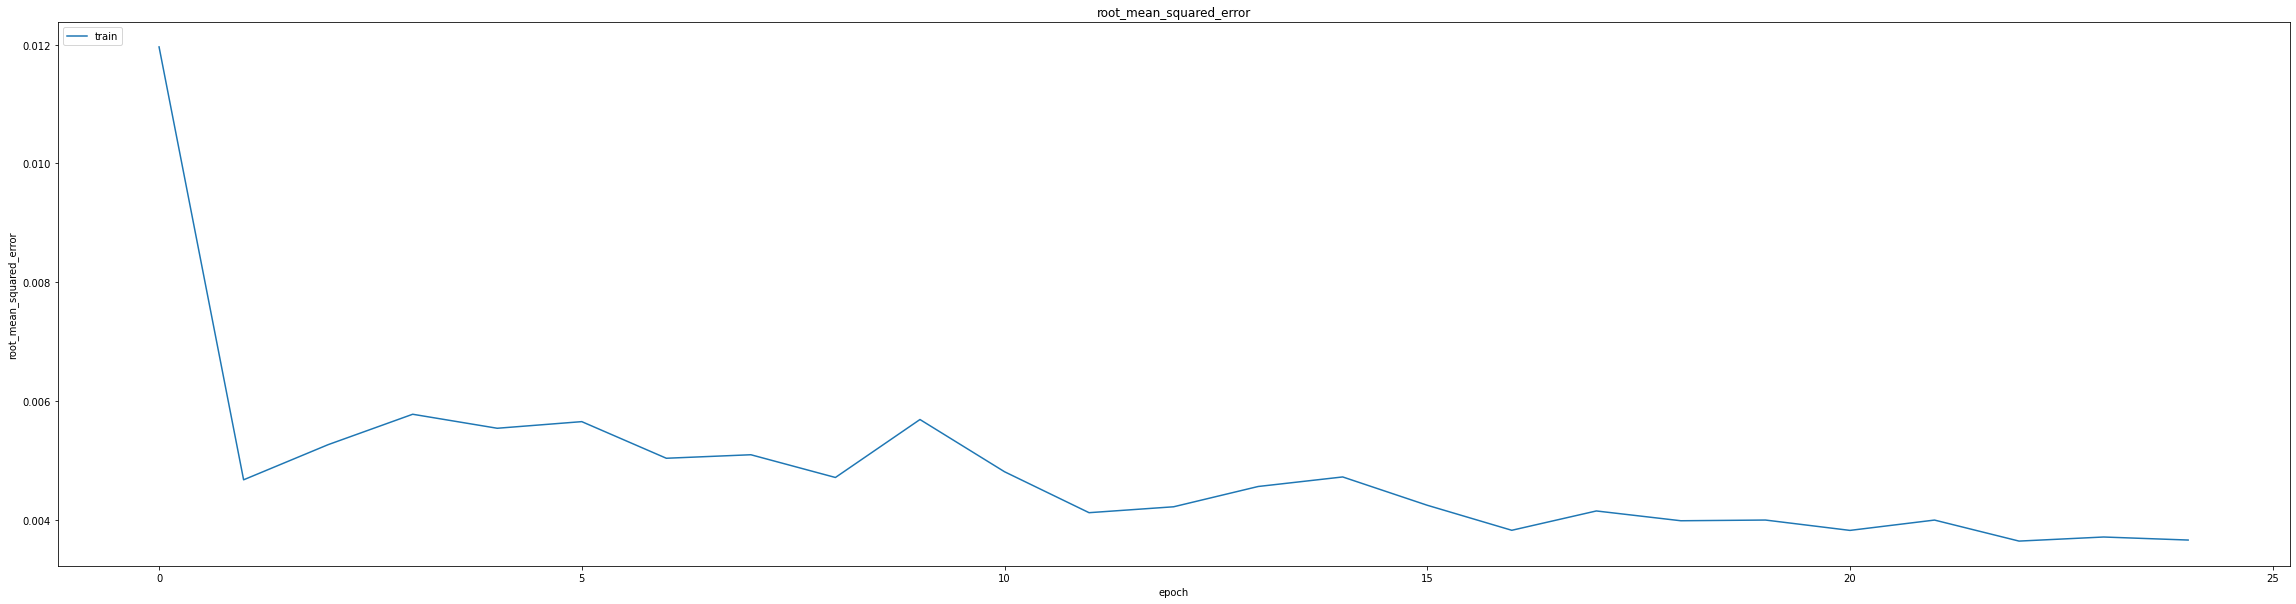

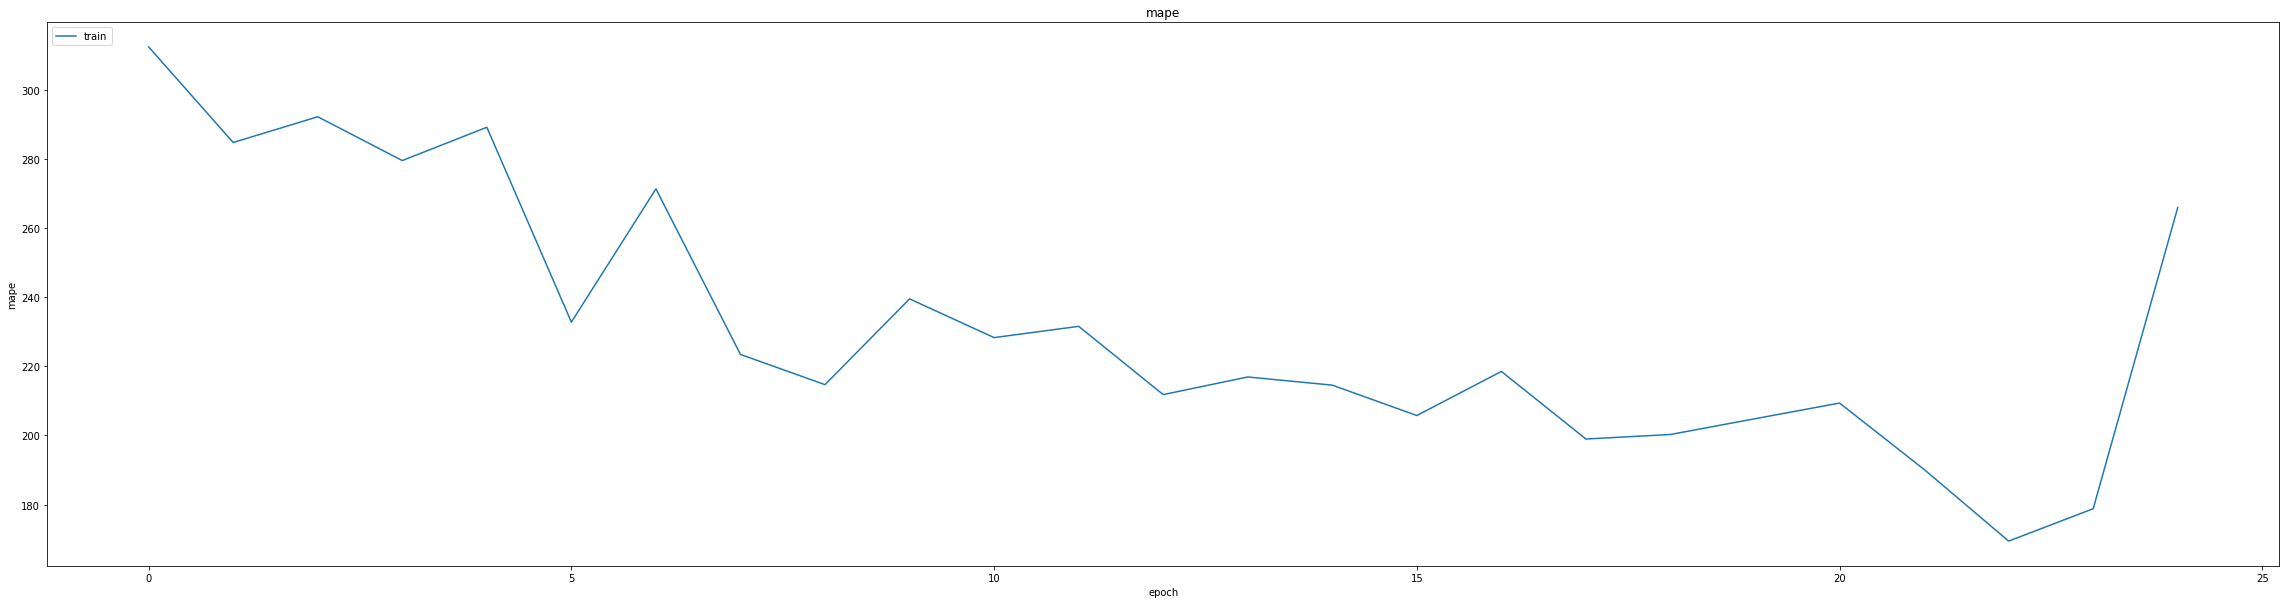

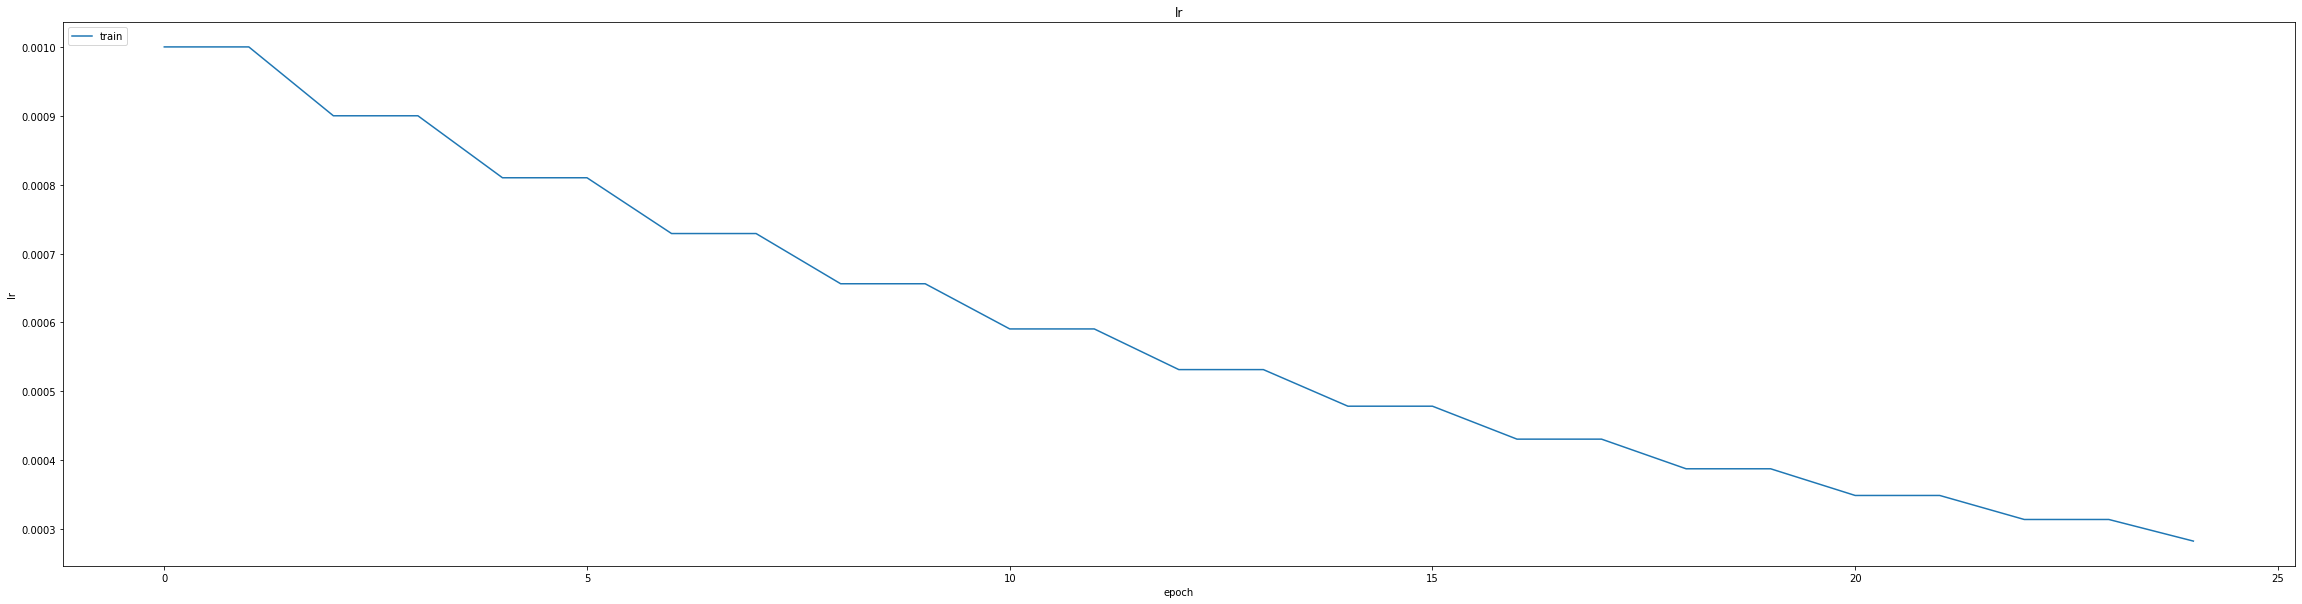

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['var_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.016712235286831856
0.020076021552085876
234/234 [==============================] - 16s 52ms/step
0.9814401502635136


In [ ]:
model.load_weights("weights.best.hdf5")

234/234 [==============================] - 9s 39ms/step


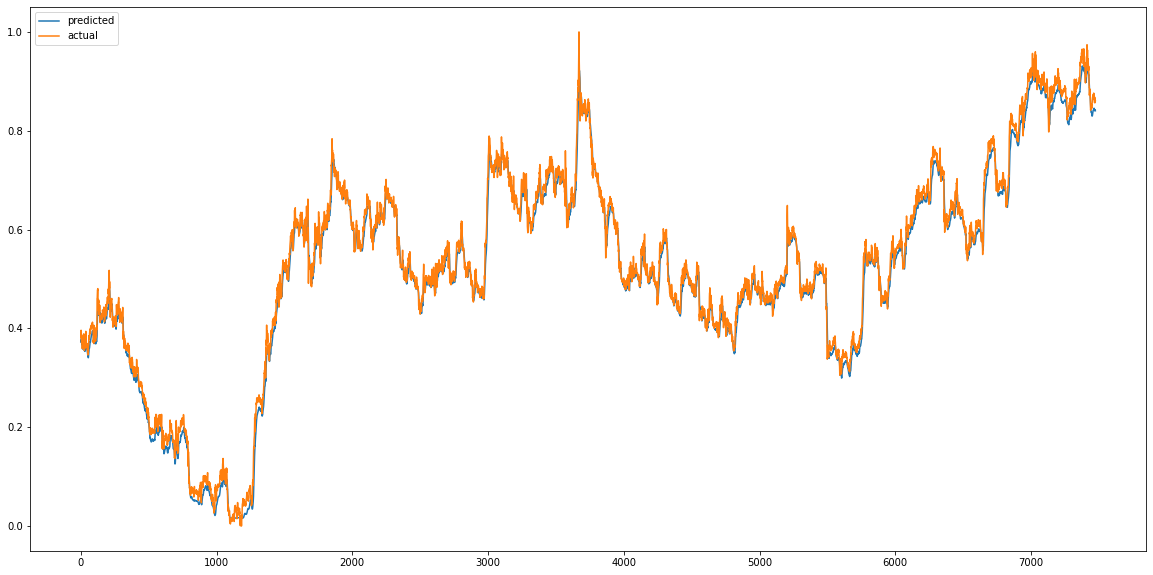

In [ ]:
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


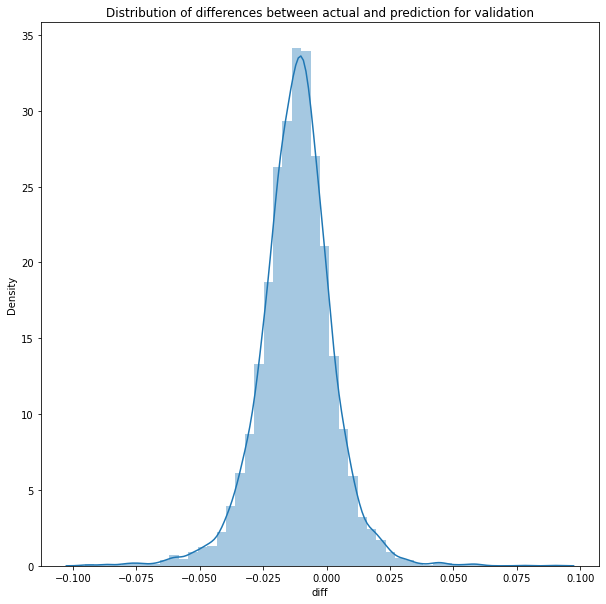

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

229/229 [==============================] - 10s 45ms/step


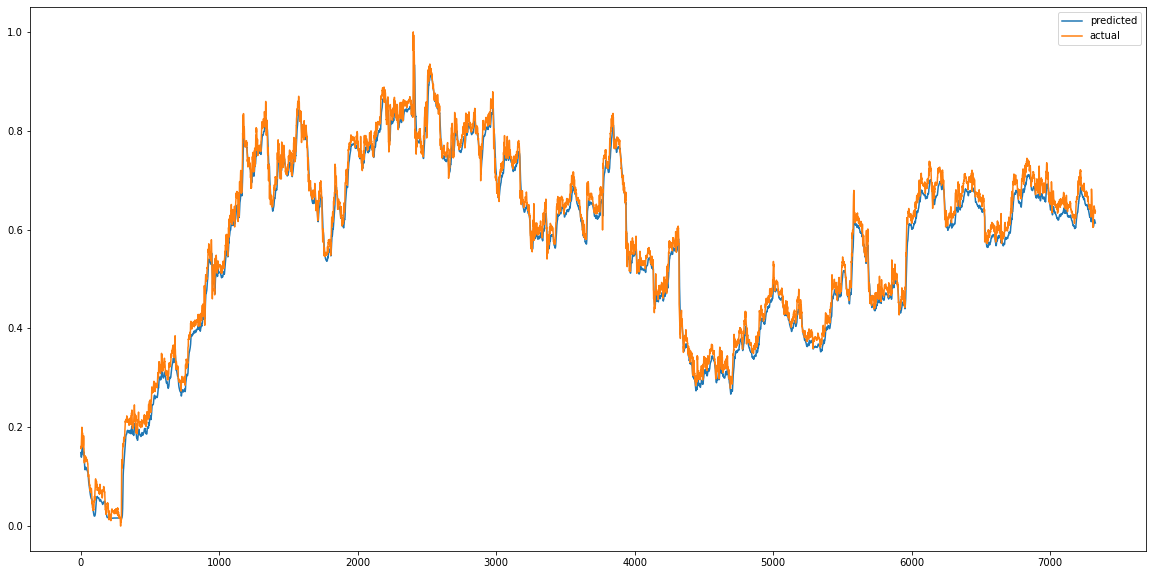

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


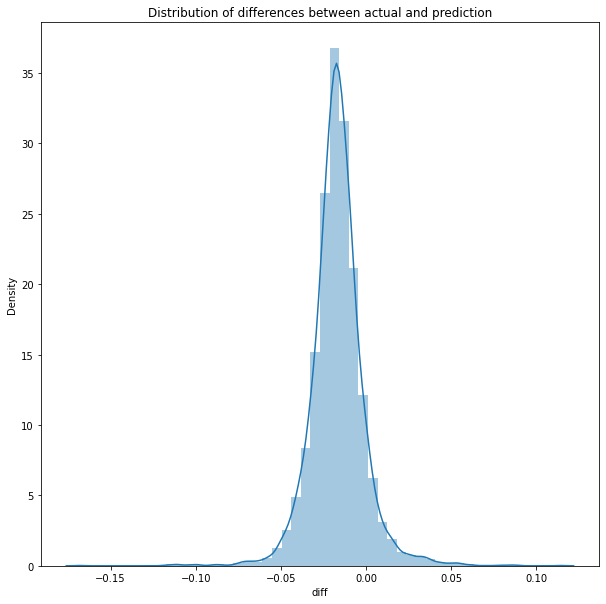

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
from math import sqrt

print('RMSE  :', sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

test_r2_scr = thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :',test_r2_scr)


predictions['diff'].describe()

MSE :  0.000525953692861922
MAE :  0.01914126894680283
RMSE  : 0.02293368031655456
229/229 [==============================] - 9s 39ms/step
R2_Score  : 0.9863308012846367


count    7328.000000
mean       -0.016762
std         0.015653
min        -0.168068
25%        -0.024526
50%        -0.017041
75%        -0.009192
max         0.114082
Name: diff, dtype: float64